# 1. Los Angeles Clean Streets Index Analysis

# 2. Questions We Addressed
*As in your project proposal, describe the intended audience and the business case for finding a solution to your question.*

*If your question changed significantly compared to your project proposal, please explain.*

We want to determine if there is a correlation between clean streets using the Los Angeles Clean Streets Index and other city features, such as household median income and crime locations.

From our findings, if we find a correlation between these features, then we can create a business use case in which we recommend certain street areas with high scores from the Clean Streets Index where business owners could build their businesses. This way, we could incorporate household median income as a proxy for communities with more disposable income that people could spend at these new businesses. 

The rate of burglary and break-ins that occur in a given area may also have an effect on where someone may choose to locate a new business. Therefore, by identifying high-crime areas we hope to be able to reccomend safer areas for prospective business owners to locate their new franchises. 

Furthermore, by using the entirety of the city of Los Angeles our hope is to identify a number of different potential locations within the bounds of the city for business owners to choose from. This will ensure that we cater to businesses of all types in all areas of the city.

Lastly, we want to know if there are steps being taken to improve the cleanliness of certain sectors within the city. We will examine proposed solutions and initiatives by the representatives from several Council Districts within Los Angeles. For those who have clean districts, what is the reason? For those who don't, are they taking steps in the right direction?

So, the expected audience is business owners looking to create new or expand existing businesses, and business owners would benefit from our business use case in the aforementioned way.

# 3. Background and Literature
*At least 4 bibliographic references (with links) relevant to your question. These don’t have to be new references; you can continue what you started in your project proposal. As before, the references can include research publications, online articles, blogs, github repos, online applications, etc.*

*As a new element of this section, reflect on how these references helped you specify the problem more narrowly, or focus on a specific hypothesis, or question conclusions they made, or improve over previously available code.*

### Hein Online: 

https://heinonline.org/HOL/Page?collection=journals&handle=hein.journals/uchclf2005&id=329&men_tab=srchresults

This article describes the relationship between crime and real estate redevelopment in Downtown Los Angeles. According to this article, Los Angeles’s Skid Row is at the epicenter of an urban struggle that may reveal how America’s disorderly urban neighborhoods experience change. 

This struggle covers everything from zoning to public toilets. In this sense, this place serves as a window to observe how an urban downtown area becomes gentrified. This article also touches on the crime, public health, urban planning, and real estate statistics. We expect to confirm their findings since historically, Skid Row is a more underdeveloped part of LA. 

### Taylor and Francis Online:

https://www.tandfonline.com/doi/full/10.1080/1369183X.2013.756659

It examines how local repressive policies affect the economic mobility of immigrant fruit vendors in Los Angeles County. In the face of government enforcement, fruit vendors have implemented strategies that allow for short-term survival but fail to bolster long-term upward mobility. 

The four strategies include a reliance on kinship and paisano networks, street patrols and alerts, geographical positioning and alliance-building, and the performance and maintenance of personal, professional and symbolic hygiene. We expect to confirm their findings since there exists a correlational divide between income and race.

### NBC Los Angeles:

https://www.nbclosangeles.com/investigations/Crime-Amongst-LAs-Homeless-Population-Rises-Again-505807741.html

This article is concerened with the rise in crime amongst the homeless population in Los Angeles. When looking at the Clean Streets Index, it is stated that a street is considered unclean if it contains litter, weeds, bulky items, and instances of illegal dumping. We believe it is safe to assume that areas with a large amount of homeless people will be similar to areas with unclean streets.

With that in mind, we hope to confirm the idea that the areas with unclean streets are also the areas with higher crime rates. Furthermore, this article states how the rise in crime coming from the homeless population is driving people to move out of there homes into safer areas. If this is in fact true, that would bode well for our business owners that are looking to set up shop in low-crime areas.

### City of Los Angeles GitHub:

https://github.com/CityOfLosAngeles

This is the official GitHub profile for the city of Los Angeles. Inside this profile you'll find numerous repositories corresponding to a number of different statisitcs realted to the city of Los Angeles. The data that will be most important to us is the Council District shape files as well as the 311-Call-Center-Tracking-Data. 

The Council District shape files will allow us to break up the city of Los Angeles in a meaningful way and take a deeper dive into why certain issues are more prevelant in specific areas (whether that be due to the actions of the representative, the kind of land that district sits on, population, etc...). Additionally, the 311-Call-Center-Tracking-Data information contains information about illegal dumping and pickup requests for items like electronic waste and metal/household appliances. We expect to find that these areas with the most pickup requests are hot spots for unclean streets and thus not great locations to put a new business.

#### Reflection:

The first two articles gave us affirmation to explore and analyze Los Angeles clean streets data. With the inclusion of the NBC Los Angeles article, we decided to incorporate crime locations into our clean streets analysis to see if there is a correlation between clean streets and crime locations. In addition, we wanted to determine clusters of areas with crimes, so we can see areas of high crime that are not safe for the surrounding neighborhoods so business owners know to not set up their businesses in those areas. We wanted to include crimes as a proxy for a safety metric. In addition, the City of Los Angeles GitHub provided us with some inspiration and insight into the specific types of data sets that we should incorporate into our analysis, such as shape files of the council districts. From there, we created our own code to perform our own analysis, which is detailed below.

# 4. Python Libraries/ArcGIS Modules
*Make this a brief list – but also mention whether and how this list has evolved compared to project proposal*

In addition to the libraries that we discussed from our project proposal, such as pandas and GIS, we added new libraries and modules to perform spatial data analysis, geoenrichment, spatial statistics, and more.

- %matplotlib inline
    - displays matplotlib maps without calling plt.show()
- import numpy as np
    - call np.column_stack() when creating dataframes
- import pandas as pd
    - allows us to read in data files as dataframes
- import geopandas as gpd
    - allows us to read in data files as spatial dataframes
- from arcgis.geoenrichment import *
    - gets descriptive statistics on spatial data
- from arcgis import GIS
    - allows us to connect with ArcGIS Online
- from IPython.display import display
    - allows us to display data in a clean format
- from arcgis.geocoding import geocode
    - get corresponding map coordinates of a location
- import folium
    - allows us to make beautiful, interactive maps with python
- from folium import plugins
    - wraps some of the most popular leaflet external plugins
- import matplotlib.pyplot as plt
    - allows us to use bar charts to analyze crime rates
- import seaborn as sns
    - allows for the use of KDE plots to find discrepancies in income
- from arcgis.features import summarize_data
    - allows us to aggregate crime data points based on median income
- from arcgis.mapping import WebMap
    - displays web maps
- from arcgis.geoenrichment import *
    - provides geoenrichment/descriptive statistics of data
- import pysal as ps
    - perform spatial statistics
- from arcgis.features import use_proximity
    - create buffers
- from matplotlib import colors
    - create the hotspot/coldspot map
- from arcgis.features.manage_data import overlay_layers
    - overlay crimes with clean streets layers
- from pandas.plotting import scatter_matrix
    - display scatter matrix of different metrics

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import tweets as tweets
import geopandas as gpd
from arcgis.geoenrichment import *
from arcgis import GIS
from IPython.display import display
from arcgis.geocoding import geocode

import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
from arcgis.features import summarize_data

from arcgis.mapping import WebMap
from arcgis.geoenrichment import *
import pysal as ps
from arcgis.features import use_proximity
from matplotlib import colors
from arcgis.features.manage_data import overlay_layers
from pandas.plotting import scatter_matrix

# import arcpy
# from arcpy import env

In [0]:
# log in to ArcGIS API for Python
gis = GIS()

Enter password: ········


# 5. Data Sources
*Include a URL and a one-sentence description of each source you used. At least two of the sources should have more than 1000 spatial objects each. This is basically how we expected it in the project proposal.*

*Please reflect on how your choice of sources evolved since the proposal phase, and any concerns about the sources you used - related to data quality, provenance, access constraints, etc. Also, reflect on any data that would be helpful to address your research question, which you could not obtain (and why). Be creative! There is a lot of additional information, sometimes from less traditional sources, that may help.*

### Clean Streets Index ArcGIS (39,915 Rows): 

https://www.arcgis.com/home/item.html?id=7279dc87ea9e416d9f90bf844505a54a 

This data source presents an interactive map of the different map layers, such as clean streets, clean neighborhoods, etc.

### Clean Streets Index Dataset (42,489 Rows): 

http://geohub.lacity.org/datasets/clean-streets-index-segments-2018-q2 

This data source is the Los Angeles Clean Streets Index, which scores over 9,000 miles of streets and alleys. Each segment received a "cleanliness score" from 1 to 3, and each street score is based on four factors: litter, weeds, bulky items and illegal dumping.

### Median Household Income by Council Districts:

https://data.lacity.org/dataset/Median-Household-Income-by-Council-Districts/khbi-qsyb

The EconomyPanel features demographic and economic data about the city’s different council districts, broken down into six broad categories including: population, gender, income, employment, housing, and building permits. For the sake of this project we are only concerened with income.

### 2010 Census Populations by Zip:

https://catalog.data.gov/dataset/2010-census-populations-by-zip-code

Just like the title specifies, this dataset contains the population of each zip code. Zip codes are limited to those that fall at least partially within Los Angeles city boundaries.

### 311 Call Center Data:

https://data.lacity.org/A-Well-Run-City/MyLA311-Service-Request-Data-2018/h65r-yf5i

This dataset contains service request data from MyLA311 for 2018. This includes requests submitted via 311, call centers, email, mobile apps, website, and other sources.

### California Cities by Population

https://www.california-demographics.com/cities_by_population

The data is from the US Census in 2010. Listed are 1,492 California cities ranked 1 through 1364.

#### Evolution of Data Sources:

While we continued to work with the two original datasets that we included in our project proposal, we knew more external sources would be neccesary to ensure that our conclusion was legitimate. As such, we sought out data related to household income, population, and criminal activity. These other data sources allowed us to make an educated guess when it came to deciding where the best spots put a new business were.

One concern we had with our data sources was the discrepancy in the years they were published. Our income data was published in 2015, the clean streets data is from 2018, the census data came from the most recent census in 2010, and the crime data is the most recent published in April of 2019.

It would have been ideal if all of our data sources were published in the same year, but each source was able to be merged with all others which made our analysis easy to execute.

Data that would've been helpful to have in order to help us continue our research is an allocation of clean streets at different levels. For example, knowing what percentage of streets in each district had a score of 1, 2, or 3 could have helped us make a more general conclusion about which districts were well suited for new businesses and which were not.

In [0]:
# Read in CSV files
data311 = pd.read_csv('data/MyLA311_Service_Request_Data_2019.csv')
median_income = pd.read_csv('data/Median_Household_Income_by_Council_Districts.csv')
ca_cities_by_pop = pd.read_csv('data/ca_cities_by_pop.csv')
ca_zips_by_pop = pd.read_csv('data/2010_Census_Populations_by_Zip_Code.csv')

# Read in shape files
shpFileIn = 'data/Clean_Streets_Index_Segments_2018_Quarter_3/Clean_Streets_Index_Segments_2018_Quarter_3.shp'
clean_streets_segments_Q3 = gpd.read_file(shpFileIn)
shpFileIn2 = 'data/Clean_Streets_Index_Grids_2018_Quarter_3/Clean_Streets_Index_Grids_2018_Quarter_3.shp'
clean_streets_grids_Q3 = gpd.read_file(shpFileIn2)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# display shape and first 2 rows
display(data311.shape)
data311.head(2)

(464502, 34)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1309493281,03/15/2019 12:43:54 AM,03/22/2019 02:20:54 PM,SR Created,BOS,Bulky Items,Closed,Call,BOS,NaN,...,"(34.2694059483, -118.422897667)",502,D,2.0,North Valley APC,7.0,Monica Rodriguez,7.0,PACOIMA NC,FOOTHILL
1,1-1309510519,03/15/2019 07:05:36 AM,03/18/2019 03:01:12 PM,SR Created,OCB,Graffiti Removal,Cancelled,Mobile App,Self Service,iOS,...,"(34.0888983231, -118.25939512)",594,E,6.0,East Los Angeles APC,13.0,Mitch O'Farrell,38.0,SILVER LAKE NC,NORTHEAST


In [0]:
# display first 2 rows
median_income.head(2)

,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source
0,DEMOGRAPHICS,MEDIAN HOUSEHOLD INCOME,NaN,LOS ANGELES CITY,NaN,1,NaN,NaN,2013,NaN,NaN,04-11-2017,$,NaN,"38,673.584",U.S. CENSUS BUREAU; BEACON ECONOMICS
1,DEMOGRAPHICS,MEDIAN HOUSEHOLD INCOME,NaN,LOS ANGELES CITY,NaN,10,NaN,NaN,2013,NaN,NaN,04-11-2017,$,NaN,"36,242.685",U.S. CENSUS BUREAU; BEACON ECONOMICS


In [0]:
# display first 2 rows
clean_streets_segments_Q3.head(2)

,OBJECTID,StreetName,GridID,AddressRan,GlobalID,SegmentID,CS_RoundSc,CD,BIScore,IDScore,LLScore,WdsScore,Shape__Len,geometry
0,1001,27th Ave,1441,1.0,e2059b67-1dc8-4a2e-8ef7-e89a6fadc6cb,2300,1,11,1,1,1,1,162.938366,LINESTRING (-118.468621000886 33.9811400001989...
1,1002,27th Pl,1441,1.0,792f371c-60cf-4994-9345-00db76a62535,2301,1,11,1,1,1,1,123.191789,LINESTRING (-118.468107999977 33.9810570001496...


In [0]:
# display first 2 rows
clean_streets_grids_Q3.head(2)

,OBJECTID_1,GridID,Seg_Bk_Sco,Seg_ID_Sco,Seg_LL_Sco,Seg_Wd_Sco,CSCatScore,Ones,Twos,Threes,Shape__Are,Shape__Len,geometry
0,1001,1737,0,0,0,0,1,73.0,None,None,2.301369e+06,6113.990918,"POLYGON ((-118.502164915554 34.2779654507938, ..."
1,1002,1738,1,0,0,0,1,43.0,None,None,1.164189e+06,4571.230160,"POLYGON ((-118.486816533273 34.2719442754645, ..."


<Item title:"USA Counties (Generalized)" type:Feature Layer Collection owner:esri_dm>
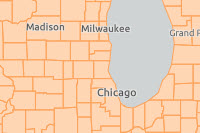

In [0]:
# Access the USA Counties item from the Living Atlas to return geometry of Los Angeles county
counties_item = gis.content.get('7566e0221e5646f99ea249a197116605')
counties_item

In [0]:
# Select Los Angeles County:
counties_lyr = counties_item.layers[0]
study_area_query = counties_lyr.query("FIPS='06037'", return_geometry=True)

In [0]:
# Get the geometry of the Los Angeles County feature.
# We will use this geometry to extract the input data for the study area.
study_area_geom = study_area_query.features[0].geometry
study_area_geom['spatialReference'] = study_area_query.spatial_reference

<Item title:"3rdGrade_Districts_2018_shp" type:Feature Layer Collection owner:NRichardson@ph.lacounty.gov_lacounty>
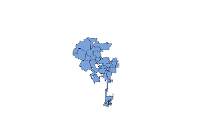

In [0]:
# Access the Los Angeles Council Districts item from the Living Atlas
districts_item = gis.content.get('680def56ddb54b809054509c5826349d')
districts_item

In [0]:
# Use geocoding to get the location of the study area in the spatial reference of the input data for the analysis.
study_area_gcd = geocode(address='Los Angeles County, CA', out_sr=districts_item.extent)

# This extent will be used for displaying the input data and output results.
study_area_extent = study_area_gcd[0]['extent']
study_area_extent

{'xmax': -117.51493766799997,
 'xmin': -118.92693766799998,
 'ymax': 35.04877854600004,
 'ymin': 33.63677854600003}

<Item title:"Clean Streets Index Grids 2018 Quarter 3" type:Feature Layer Collection owner:rodell.zorilla_lasangeohub>
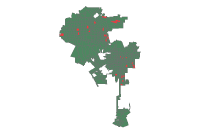

In [0]:
# Access the Clean Streets Grids Index item from the Living Atlas
clean_streets_grids_item = gis.content.get('be1a5a0cbe6040c1a5384eef2020b953')
clean_streets_grids_item

<Item title:"Clean Streets Index Segments 2018 Quarter 3" type:Feature Layer Collection owner:rodell.zorilla_lasangeohub>
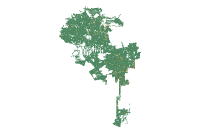

In [0]:
# Access the Clean Streets Segments Index item from the Living Atlas
clean_streets_segments_item = gis.content.get('cd5f2baea423435488c3c30b3866ac5e')
clean_streets_segments_item

In [0]:
# Get cleans streets segments feature layer from the item
clean_streets_segments_lyr = clean_streets_segments_item.layers[0]
clean_streets_segments_lyr

<FeatureLayer url:"https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/Clean_Streets_Index_Segments_2018_Q3/FeatureServer/0">

<Item title:"Income_MedianHouseholdIncome_2015_NDSC" type:Feature Layer Collection owner:uscssi_research>
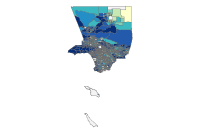

In [0]:
# Access the Median Household Income item from the Living Atlas
median_income_item = gis.content.get('df8d1af6fb1d48a8a7afb4eb14572233')
median_income_item

In [0]:
# Get median income feature layer from the item
median_income_lyr = median_income_item.layers[0]
median_income_lyr

<FeatureLayer url:"https://services1.arcgis.com/ZIL9uO234SBBPGL7/arcgis/rest/services/Income_MedianHouseholdIncome_2015_NDSC/FeatureServer/0">

<Item title:"LA_Dataset" type:Feature Layer Collection owner:core9074@esri.com_esripw>
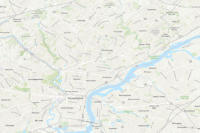

In [0]:
# Access the Los Angeles Crime item from the Living Atlas
crimes_item = gis.content.get('e40facbdc1db4f0197beb73017e8c211')
crimes_item

In [0]:
# Get crime feature layer from the item
crimes_lyr = crimes_item.layers[0]
crimes_lyr

<FeatureLayer url:"https://services.arcgis.com/hqZZWIy9SdeCyAr7/arcgis/rest/services/LA_Dataset/FeatureServer/0">

<Item title:"Los Angeles Traffic" type:Web Map owner:AtlasPublisher>
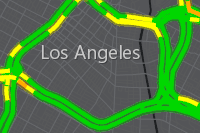

In [0]:
# Access the traffic item from the Living Atlas
traffic_item = gis.content.get('306eba7e8bc242d39f7347ff70a5f960')
traffic_item

In [0]:
# # Access the Los Angeles Crime item from the Living Atlas
# parking_lots_item = gis.content.get('be7c8c4ab95b4d82af18255ad1a3212c')
# parking_lots_item

In [0]:
# # Access the enterprise zones item from the Living Atlas
# enterprise_zones_item = gis.content.get('b3453bb13a2e43fc917afb8f829341ef')
# enterprise_zones_item

In [0]:
# # Access the Olympics item from the Living Atlas
# olympics_item = gis.content.get('c8201ac7a1d64145af1ad9066c51ad0a')
# olympics_item

# 6. Data Cleaning
*Describe the cleaning/wrangling operations that you performed, and whether you realized you needed to clean the data by examining metadata documents or by introspecting the data itself.*

*Was the amount of cleaning/data preparation similar to what you expected when writing project
proposal?*

All things considered, the process of data cleaning for our project was surprisingly minimal. The spatial objects that we needed to pull from each data source were put together well and made feature layer combination relatively painless.

One issue we did encounter when attempting to use spatial join was a discrepancy in the CRS between spatial dataframes. When we tried to join the Median Household Income data and the Crimes data we realized they had different coordinate reference systems. 

* Median Income, {'latestWkid' : 6424, 'wkid' : 103007}
* Crimes, {'latestWkid' : 4326, 'wkid' : 4326}

Converting Median Income to 4326 solved this issue and allowed us to utilize spatial join.

In addition, we cleaned the ca_cities_by_pop data set by making the text for the cities upper case, removing any commas, and converting the population to integers.

Furthermore, we cleaned the ca_zips_by_pop data set by setting the index to the zip codes and keeping only the Total Population column.

In [0]:
# Create a dictionary that maps the council district number to the respective council member
council_district_dict = {
    '1': 'Gilbert Cedillo',
    '2': 'Paul Krekorian',
    '3': 'Bob Blumenfield',
    '4': 'David Ryu',
    '5': 'Paul Koretz',
    '6': 'Nury Martinez',
    '7': 'Monica Rodriguez',
    '8': 'Marqueece Harris-Dawson',
    '9': 'Curren D. Price, Jr',
    '10': 'Herb J. Wesson, Jr',
    '11': 'Mike Bonin',
    '12': 'Greig Smith',
    '13': "Mitch O'Farrell",
    '14': 'Jose Huizar',
    '15': 'Joe Buscaino',
    'CITY TOTAL': 'CITY TOTAL'
}

# Create a new column called council_district_name to display the council member's name for each council district
median_income['council_district_name'] = median_income['council_district'].map(council_district_dict)
median_income.head(2)

,category,indicator,sub_indicator,locality,gender,council_district,fiscal_year,fy_qtr,calendar_year,cy_qtr,quarter_start,as_of_date,unit_of_measure,unit_text,value,source,council_district_name
0,DEMOGRAPHICS,MEDIAN HOUSEHOLD INCOME,NaN,LOS ANGELES CITY,NaN,1,NaN,NaN,2013,NaN,NaN,04-11-2017,$,NaN,"38,673.584",U.S. CENSUS BUREAU; BEACON ECONOMICS,Gilbert Cedillo
1,DEMOGRAPHICS,MEDIAN HOUSEHOLD INCOME,NaN,LOS ANGELES CITY,NaN,10,NaN,NaN,2013,NaN,NaN,04-11-2017,$,NaN,"36,242.685",U.S. CENSUS BUREAU; BEACON ECONOMICS,"Herb J. Wesson, Jr"


In [0]:
# populations of all cities in California
ca_cities_by_pop['City'] = ca_cities_by_pop['City'].str.upper()
ca_cities_by_pop['Population'] = ca_cities_by_pop['Population'].str.replace(',', '')
ca_cities_by_pop['Population'] = ca_cities_by_pop['Population'].astype(int)
ca_cities_by_pop.set_index('City')['Population'].head(10)

City
LOS ANGELES      3949776
SAN DIEGO        1390966
SAN JOSE         1023031
SAN FRANCISCO     864263
FRESNO            519037
SACRAMENTO        489650
LONG BEACH        470489
OAKLAND           417442
BAKERSFIELD       372680
ANAHEIM           349007
Name: Population, dtype: int64

In [0]:
# California zip codes by population
ca_zips_by_pop = ca_zips_by_pop.set_index('Zip Code')['Total Population']
ca_zips_by_pop.sort_values(ascending=False).head(10)

Zip Code
90650    105549
90011    103892
91331    103689
90201    101279
90280     94396
90805     93524
90250     93193
91342     91725
90044     89779
91744     85040
Name: Total Population, dtype: int64

# 7. Descriptive Statistics
Explore the data using ___maps, charts, and common descriptive statistics___.

Sample questions you can try to answer: 
- is there spatial autocorrelation in the data? 
- Are you dealing with random point patterns? 
- What is the spatial mean and standard distance? 
- Or why the above questions are not relevant to your research theme and the data?

### Note:
These questions are answered in part 8.

In [0]:
# Show Clean Streets scores for each grid/region. There's only scores of 1 and 3, not 2
clean_streets_grids_Q3['CSCatScore'].value_counts()

1    1103
3      32
Name: CSCatScore, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(115.905,0.5,'Latitude')

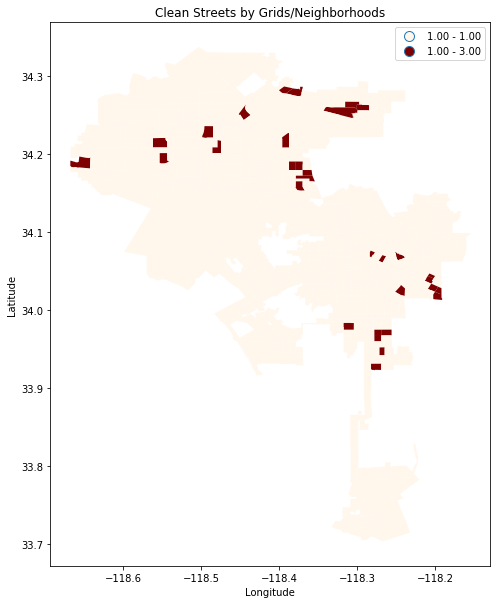

In [0]:
# Plot Clean Streets scores for each grid/region
csg_plot = clean_streets_grids_Q3.plot(
    column='CSCatScore', cmap='OrRd', scheme ='quantiles', k=2, 
    categorical=False, legend=True, figsize=(10,10)
)
csg_plot.set_title('Clean Streets by Grids/Neighborhoods')
csg_plot.set_xlabel('Longitude')
csg_plot.set_ylabel('Latitude')

In [0]:
# Show Clean Streets scores for each segment
clean_streets_segments_Q3['CS_RoundSc'].value_counts()

1    41432
2      877
3      180
Name: CS_RoundSc, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/opt/conda/lib/python3.6/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 3
  Warn('Warning: setting k to %d' % k_q, UserWarning)


Text(115.587,0.5,'Latitude')

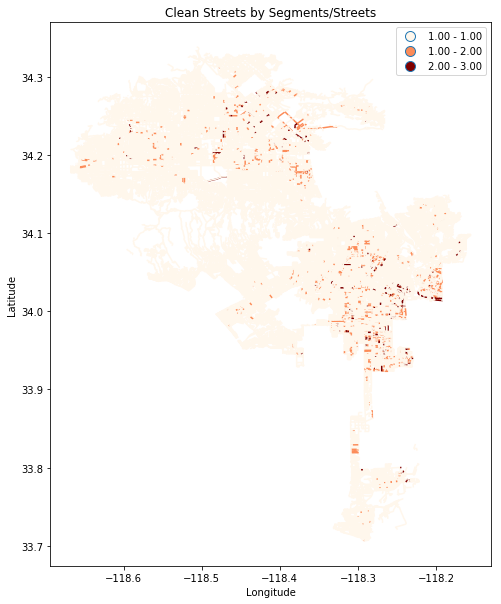

In [0]:
# Plot Clean Streets scores for each segment
css_plot = clean_streets_segments_Q3.plot(
    column='CS_RoundSc', cmap='OrRd', scheme ='quantiles', k=41, 
    categorical=False, legend=True, figsize=(10,10)
)
css_plot.set_title('Clean Streets by Segments/Streets')
css_plot.set_xlabel('Longitude')
css_plot.set_ylabel('Latitude')

## Creating the GIS and Web Maps

In [0]:
# This looks like a nice imagery layer. Let's add it to a map widget
LA_map = gis.map()
LA_map.extent = study_area_extent
LA_map.legend = True

# Add median household income layer to LA map
LA_map.add_layer(median_income_lyr)
LA_map

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [0]:
# Add council districts to LA map 
LA_map.add_layer(districts_item)

In [0]:
# Add clean streets grids to LA map
LA_map.add_layer(clean_streets_grids_item)

In [0]:
# Add clean streets segments to LA map
LA_map.add_layer(clean_streets_segments_item)

In [0]:
# TODO: Pick one of these layers to represent crimes

# Add crimes layer to LA map
# LA_map.add_layer(crimes_item)
LA_map.add_layer(crimes_item, {"renderer":"HeatmapRenderer", "opacity":0.5})

In [0]:
# Add parking lots layer to LA map
# LA_map.add_layer(parking_lots_item)

In [0]:
# Add olympics layer to LA map
# LA_map.add_layer(olympics_item)

In [0]:
# Add enterprise zones layer to LA map
# LA_map.add_layer(enterprise_zones_item)

In [0]:
# Save LA map to AGOL (already saved, we later call gis.content.get() in our discussion at the end of the notebook)
# webmap_item_properties = {'title':'LA Clean Streets, Crime, and Median Income',
#                          'snippet':'Map created using ArcGIS API for Python showing LA clean streets',
#                          'tags':['clean streets', 'crime', 'median income', 'python']}
# LA_map.save(webmap_item_properties, thumbnail='./LA_map_thumbnail.png')

In [0]:
# Display traffic web map
traffic_map = WebMap(traffic_item)
traffic_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

# 8. Analysis
*Provide a general outline of your analysis (in a markdown), and then document it step by step as you code the solution. Please make sure that we can reproduce your analysis by running your notebook. As before, a diagram describing your workflow would be helpful.*

*Please also reflect on how your actual analysis steps were different compared to your project proposal - or state that you didn’t deviate from the initial plan.*

___Important Metrics:___
- Clean Streets
- Income
- Crime

___Analysis Outline:___
- Crimes data to determine clusters of areas that have crimes.
- Clean Streets Grids data to determine areas that business owners should start their businesses.
- Clean Streets Segments data to determine specific streets that business owners should start their businesses.
- Median Household Income Data to see if there is a correlation between areas of clean streets and areas of high median household income.
- Esri Report to look at demographics or other business metrics of the top 5 areas/regions for business owners to set up their businesses, based on our analysis.
- Geoenrichment using Enrich() and BufferStudyArea to see how far UCLA and USC students can travel from the campuses in certain amounts of time.
- Spatial Autocorrelation Analysis to see if spatial autocorrelation is relevant to our data, and if so, if our data demonstrates any spatial autocorrelation.

## Crimes Data
Here, we want to find insights on the types and frequency of crimes to determine clusters of areas that have burglaries to highlight those areas as harmful to businesses.

In [0]:
# Create SEDF from crime feature layer
crimes_sdf = pd.DataFrame.spatial.from_layer(crimes_lyr)
crimes_sdf.head().T.head()

,0,1,2,3,4
AddBldg,,,,,
AddNum,6200,9500,600,1500,7500
AddNumFrom,6230,9698,726,1698,
AddNumTo,6142,9500,500,1300,
AddRange,6142-6230,9500-9698,500-726,1300-1698,


In [0]:
# Display original spatial reference of the crimes layer
crimes_lyr.query().spatial_reference

{'latestWkid': 4326, 'wkid': 4326}

In [0]:
# crime rates for cities in Los Angeles County
crime_rate_per_city = crimes_sdf['USER_CITY'].value_counts() / ca_cities_by_pop.set_index('City')['Population']
crime_rate_per_city = crime_rate_per_city.dropna().sort_values(ascending=False)
crime_rate_per_city.head(10)

INDUSTRY          0.431138
LITTLEROCK        0.017017
VERNON            0.013158
WEST HOLLYWOOD    0.010540
COMMERCE          0.009001
MALIBU            0.008546
CASTAIC           0.007617
COMPTON           0.006858
DUARTE            0.005726
LANCASTER         0.005321
dtype: float64

,Count,Normalized,Crime Rate
LOS ANGELES,1309.0,0.123003,0.000331
LANCASTER,852.0,0.080060,0.005321
COMPTON,671.0,0.063052,0.006858
PALMDALE,553.0,0.051964,0.003514
CARSON,425.0,0.039936,0.004573
WEST HOLLYWOOD,381.0,0.035802,0.010540
NORWALK,322.0,0.030257,0.003026
BELLFLOWER,279.0,0.026217,0.003584
LAKEWOOD,277.0,0.026029,0.003415
CERRITOS,259.0,0.024338,0.005165


Text(0,0.5,'Normalized Number of Crimes')

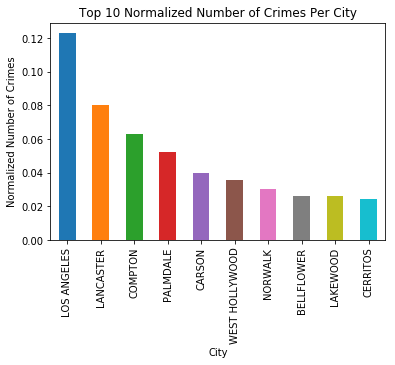

In [0]:
# Top 10 Cities within LA County for crimes
crimes_per_city = pd.DataFrame(
    np.column_stack([
        crimes_sdf['USER_CITY'].value_counts().values, 
        crimes_sdf['USER_CITY'].value_counts(normalize=True).values
    ]),
    index = crimes_sdf['USER_CITY'].value_counts().index,
    columns = ['Count', 'Normalized']
)

crimes_per_city = crimes_per_city.merge(crime_rate_per_city.to_frame(name='Crime Rate'), left_index=True, right_index=True)

display(crimes_per_city.head(10))
ax = crimes_sdf['USER_CITY'].value_counts(normalize=True).head(10).plot(
    kind='bar', title='Top 10 Normalized Number of Crimes Per City'
)
ax.set_xlabel('City')
ax.set_ylabel('Normalized Number of Crimes')

,Count,Normalized,Crime Rate
INDUSTRY,144.0,0.013531,0.431138
LITTLEROCK,34.0,0.003195,0.017017
VERNON,1.0,0.000094,0.013158
WEST HOLLYWOOD,381.0,0.035802,0.010540
COMMERCE,117.0,0.010994,0.009001
MALIBU,110.0,0.010336,0.008546
CASTAIC,147.0,0.013813,0.007617
COMPTON,671.0,0.063052,0.006858
DUARTE,125.0,0.011746,0.005726
LANCASTER,852.0,0.080060,0.005321


Text(0,0.5,'Crime Rate per Capita')

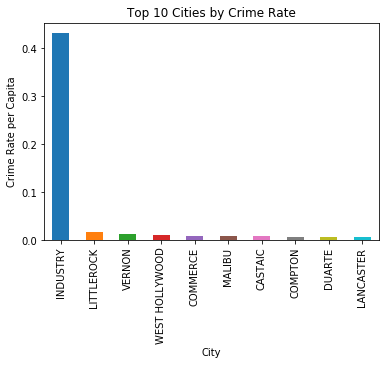

In [0]:
# Top 10 Cities within LA County by crime rate
crimes_per_city = crimes_per_city.sort_values('Crime Rate', ascending=False)
display(crimes_per_city.head(10))
ax = crimes_per_city['Crime Rate'].head(10).plot(
    kind='bar', title='Top 10 Cities by Crime Rate'
)
ax.set_xlabel('City')
ax.set_ylabel('Crime Rate per Capita')

In [0]:
# Industry, CA has a high crime rate compared to other cities 
# because it has a population of only 334 people, but
# 144 crimes were committed there, according to our data sets.
# So, let's remove Industry, CA to get a better histogram.
ca_cities_by_pop.set_index('City')['Population']['INDUSTRY']

334

,Count,Normalized,Crime Rate
LITTLEROCK,34.0,0.003195,0.017017
VERNON,1.0,0.000094,0.013158
WEST HOLLYWOOD,381.0,0.035802,0.010540
COMMERCE,117.0,0.010994,0.009001
MALIBU,110.0,0.010336,0.008546
CASTAIC,147.0,0.013813,0.007617
COMPTON,671.0,0.063052,0.006858
DUARTE,125.0,0.011746,0.005726
LANCASTER,852.0,0.080060,0.005321
CERRITOS,259.0,0.024338,0.005165


Text(0,0.5,'Crime Rate per Capita')

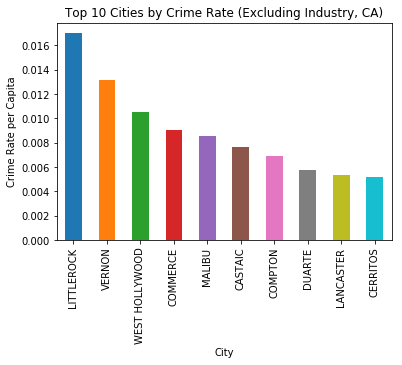

In [0]:
# Top 10 Cities within LA County by crime rate (remove the Industry, CA anomaly from top 10)
display(crimes_per_city[1:11])
ax = crimes_per_city['Crime Rate'][1:11].plot(
    kind='bar', title='Top 10 Cities by Crime Rate (Excluding Industry, CA)'
)
ax.set_xlabel('City')
ax.set_ylabel('Crime Rate per Capita')

In [0]:
# california zip codes by crime rate
crime_rate_by_zip = (crimes_sdf['USER_ZIP'].value_counts() / ca_zips_by_pop)
crime_rate_by_zip = crime_rate_by_zip.dropna().sort_values(ascending=False)

# eliminates two zip codes with inaccurate population counts
crime_rate_by_zip = crime_rate_by_zip.drop([91608.0,91371.0])
crime_rate_by_zip.head(10)

90040.0    0.007588
90012.0    0.007459
90069.0    0.005468
90712.0    0.004730
91010.0    0.004411
91384.0    0.004153
91773.0    0.003925
90265.0    0.003367
90022.0    0.003290
91770.0    0.003285
dtype: float64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Count,Normalized,Crime Rate,Neighborhood/City
90012.0,232.0,0.040201,0.007459,Chinatown
90650.0,224.0,0.038815,0.002122,Norwalk
90022.0,221.0,0.038295,0.003290,East Los Angeles/Eastmont
90706.0,208.0,0.036042,0.002715,Bellflower
91770.0,204.0,0.035349,0.003285,Rosemead/South San Gabriel
90723.0,165.0,0.028591,0.003050,Paramount
91744.0,157.0,0.027205,0.001846,La Puente
90660.0,154.0,0.026685,0.002447,Pico Rivera
90712.0,149.0,0.025819,0.004730,Lakewood
91748.0,146.0,0.025299,0.003215,Rowland Heights


Text(0,0.5,'Normalized Number of Crimes')

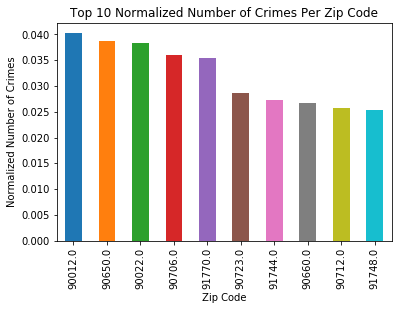

In [0]:
# Top 10 Zip Codes within LA County for crimes
zipcode_list = [
    'Chinatown',
    'Norwalk',
    'East Los Angeles/Eastmont',
    'Bellflower',
    'Rosemead/South San Gabriel',
    'Paramount',
    'La Puente',
    'Pico Rivera',
    'Lakewood',
    'Rowland Heights'
]
crimes_per_zip = pd.DataFrame(
    np.column_stack([
        crimes_sdf['USER_ZIP'].value_counts().values, 
        crimes_sdf['USER_ZIP'].value_counts(normalize=True).values,
    ]),
    index = crimes_sdf['USER_ZIP'].value_counts().index,
    columns = ['Count', 'Normalized']
)

crimes_per_zip = crimes_per_zip.merge(crime_rate_by_zip.to_frame(name='Crime Rate'), left_index=True, right_index=True)
crimes_per_zip_top10_normalized = crimes_per_zip.head(10)
crimes_per_zip_top10_normalized['Neighborhood/City'] = zipcode_list

display(crimes_per_zip_top10_normalized)
ax2 = crimes_sdf['USER_ZIP'].value_counts(normalize=True).head(10).plot(
    kind='bar', title='Top 10 Normalized Number of Crimes Per Zip Code'
)
ax2.set_xlabel('Zip Code')
ax2.set_ylabel('Normalized Number of Crimes')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Count,Normalized,Crime Rate,Neighborhood/City
90040.0,95.0,0.016462,0.007588,Commerce/Laguna
90012.0,232.0,0.040201,0.007459,Chinatown
90069.0,112.0,0.019407,0.005468,Beverly Crest/West Hollywood
90712.0,149.0,0.025819,0.004730,Lakewood
91010.0,115.0,0.019927,0.004411,Duarte
91384.0,124.0,0.021487,0.004153,Castaic
91773.0,130.0,0.022526,0.003925,San Dimas
90265.0,61.0,0.010570,0.003367,Malibu
90022.0,221.0,0.038295,0.003290,East Los Angeles/Eastmont
91770.0,204.0,0.035349,0.003285,Rosemead/South San Gabriel


Text(0,0.5,'Crime Rate per Capita')

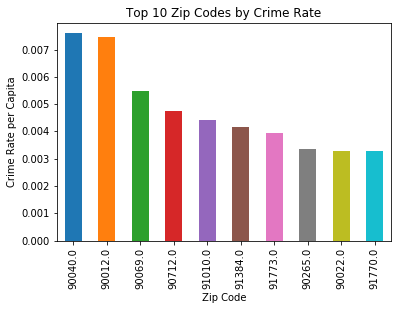

In [0]:
# Top 10 zip codes within LA County by crime rate
zipcode_list2 = [
    'Commerce/Laguna',
    'Chinatown',
    'Beverly Crest/West Hollywood',
    'Lakewood',
    'Duarte',
    'Castaic',
    'San Dimas',
    'Malibu',
    'East Los Angeles/Eastmont',
    'Rosemead/South San Gabriel'
]

crimes_per_zip = crimes_per_zip.sort_values('Crime Rate', ascending=False)
crimes_per_zip_top10_crimerates = crimes_per_zip.head(10)
crimes_per_zip_top10_crimerates['Neighborhood/City'] = zipcode_list2

display(crimes_per_zip_top10_crimerates)
ax = crimes_per_zip['Crime Rate'].sort_values(ascending=False).head(10).plot(
    kind='bar', title='Top 10 Zip Codes by Crime Rate'
)
ax.set_xlabel('Zip Code')
ax.set_ylabel('Crime Rate per Capita')

In [0]:
# Combine top 10 lists to see any common cities with high crime rates 
# to inform business owners not to set up businesses in these areas.
# Here, we see the following cities appear in both lists:
# Beverly Crest/West Hollywood, Commerce/Laguna, Malibu, Castaic, and Duarte
top10s = pd.DataFrame(np.column_stack(
    [
        crimes_per_city.head(10).index,
        crimes_per_zip_top10_crimerates['Neighborhood/City']   
    ]
), columns=['Top 10 by City', 'Top 10 by Neighborhood/City'])
top10s

,Top 10 by City,Top 10 by Neighborhood/City
0,INDUSTRY,Commerce/Laguna
1,LITTLEROCK,Chinatown
2,VERNON,Beverly Crest/West Hollywood
3,WEST HOLLYWOOD,Lakewood
4,COMMERCE,Duarte
5,MALIBU,Castaic
6,CASTAIC,San Dimas
7,COMPTON,Malibu
8,DUARTE,East Los Angeles/Eastmont
9,LANCASTER,Rosemead/South San Gabriel


,Count,Normalized
LARCENY THEFT,2086.0,0.196016
NARCOTICS,1350.0,0.126856
VEHICLE / BOATING LAWS,1319.0,0.123943
NON-AGGRAVATED ASSAULTS,900.0,0.084571
GRAND THEFT AUTO,706.0,0.066341
VANDALISM,685.0,0.064368
MISDEMEANORS MISCELLANEOUS,646.0,0.060703
BURGLARY,618.0,0.058072
AGGRAVATED ASSAULT,487.0,0.045762
WEAPON LAWS,292.0,0.027438


Text(0,0.5,'Normalized Number of Crimes')

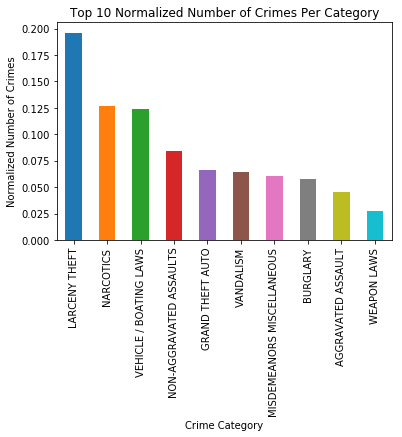

In [0]:
# Top 10 Crime Categories within LA County
crimes_per_category = pd.DataFrame(
    np.column_stack([
        crimes_sdf['USER_CATEGORY'].value_counts().head(10).values, 
        crimes_sdf['USER_CATEGORY'].value_counts(normalize=True).head(10).values
    ]),
    index = crimes_sdf['USER_CATEGORY'].value_counts().head(10).index,
    columns = ['Count', 'Normalized']
)
display(crimes_per_category)
ax3 = crimes_sdf['USER_CATEGORY'].value_counts(normalize=True).head(10).plot(
    kind='bar', title='Top 10 Normalized Number of Crimes Per Category'
)
ax3.set_xlabel('Crime Category')
ax3.set_ylabel('Normalized Number of Crimes')

,Count,Normalized
VEHICLE AND BOATING LAWS: Misdemeanor,930.0,0.087390
Misdemeanor Possessn of a Controlled Substance (excluding Marijuana),844.0,0.079308
VEHICLE BURGLARY: Auto/Passenger Van Burglary,565.0,0.053092
"MISDEMEANORS, MISCELLANEOUS: All Other Misdemeanors",555.0,0.052152
GRAND THEFT VEHICLE (GTA): Automobile/Passenger Van,538.0,0.050554
"THEFT, PETTY: Shoplifting (From Dept Store, Mkt, Etc)",409.0,0.038433
"ASSAULT, NON-AGG: Hands, Feet, Fist, Etc.",404.0,0.037963
"ASSAULT, NON-AGGRAVATED: DOMESTIC VIOLENCE",398.0,0.037399
"VEHICLE AND BOATING LAWS: Hit And Run, Misdemeanor",361.0,0.033922
VANDALISM FELONY,302.0,0.028378


Text(0,0.5,'Normalized Number of Crimes')

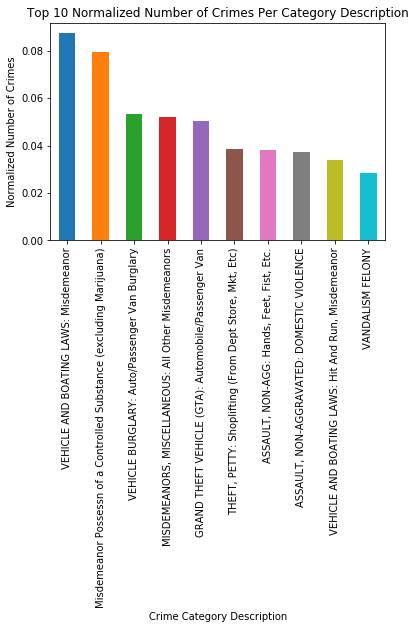

In [0]:
# Top 10 Crime Category Descriptions within LA County
crimes_per_description = pd.DataFrame(
    np.column_stack([
        crimes_sdf['USER_STAT_DESC'].value_counts().head(10).values, 
        crimes_sdf['USER_STAT_DESC'].value_counts(normalize=True).head(10).values
    ]),
    index = crimes_sdf['USER_STAT_DESC'].value_counts().head(10).index,
    columns = ['Count', 'Normalized']
)
display(crimes_per_description)
ax4 = crimes_sdf['USER_STAT_DESC'].value_counts(normalize=True).head(10).plot(
    kind='bar', title='Top 10 Normalized Number of Crimes Per Category Description'
)
ax4.set_xlabel('Crime Category Description')
ax4.set_ylabel('Normalized Number of Crimes')

In [0]:
# Heatmap of crimes using Folium
crimes_map = folium.Map([34.0156, -118.139], zoom_start=11)

In [0]:
# convert to (n, 2) nd-array format for heatmap
crimes_locations = crimes_sdf[['Y', 'X']].values

# plot heatmap
crimes_map.add_child(plugins.HeatMap(crimes_locations, radius=15))
crimes_map

In [0]:
# save map to crimes.html
crimes_map.save('crimes.html')

## Clean Street Grids Data
Here, we want to take a deep dive into the Clean Streets data to determine areas that business owners should start their businesses.

In [0]:
# Create SEDF from clean streets grids feature layer
clean_streets_grids_sdf = pd.DataFrame.spatial.from_layer(clean_streets_grids_item.layers[0])
clean_streets_grids_sdf.head(2)

,CSCatScore,GridID,OBJECTID_1,Ones,SHAPE,Seg_Bk_Sco,Seg_ID_Sco,Seg_LL_Sco,Seg_Wd_Sco,Shape__Area,Shape__Length,Threes,Twos
0,3,1001,1,45.0,"{""rings"": [[[-13197323.8882, 4058445.84700001]...",18,0,0,2,3.212410e+06,7162.732681,NaN,5.0
1,1,1003,2,44.0,"{""rings"": [[[-13196490.9937, 4058461.0344], [-...",0,0,0,0,1.564352e+06,5364.931644,NaN,NaN


In [0]:
# Display original spatial reference of the clean streets grids layer
clean_streets_grids_item.layers[0].query().spatial_reference

{'latestWkid': 3857, 'wkid': 102100}

## Clean Street Segments Data
Here, we want to take a deep dive into the Clean Streets data to determine specific streets that business owners should start their businesses.

In [0]:
# Create SEDF from clean streets segments feature layer
clean_streets_segments_sdf = pd.DataFrame.spatial.from_layer(clean_streets_segments_lyr)
clean_streets_segments_sdf.head(2)

,AddressRange,BIScore,CD,CS_RoundScore,GlobalID,GridID,IDScore,LLScore,OBJECTID,SHAPE,SegmentID,Shape__Length,StreetName,WdsScore
0,0.0,1,1,1,01d5cf85-f07b-4eac-a020-c53e4aebc497,101,1,1,1,"{""paths"": [[[-13162694.5561, 4037635.5433], [-...",1,2.983536,,1
1,0.0,1,14,1,c749ae57-465f-451b-8b5e-5d5ae9dc0315,111,1,1,3,"{""paths"": [[[-13162327.3132, 4036231.4967], [-...",3,2.307199,,1


In [0]:
clean_streets_segments_lyr.query().spatial_reference

{'latestWkid': 3857, 'wkid': 102100}

In [0]:
# construct a 100 foot buffer around all clean streets
# buffers = use_proximity.create_buffers(
#     clean_streets_segments_item.layers[0], distances=[100], units = 'Feet', output_name="clean_streets_100ftbuffers"
# )

# get buffers item from AGOL since I already called create_buffers() above
buffers = gis.content.get('caa3f52816484a099e95603873c61beb')

In [0]:
# determine the intersection of crimes that happened within the clean streets buffer 
# clipped_buffer = overlay_layers(buffers,
#                                crimes_lyr,
#                                tolerance=0,
#                                context={},
#                                output_name="crimes_buffers")

# get clipped_buffer item from AGOL since I already called overlay_layers() above
clipped_buffer = gis.content.get('b6f7a95772f749469652309d4bbc3b4f')

## Creating the Second GIS Map

In [0]:
# This looks like a nice imagery layer. Let's add it to a map widget
LA_map2 = gis.map()
LA_map2.extent = study_area_extent        
LA_map2.legend = True

# Add median income layer to LA map 2
LA_map2.add_layer(median_income_item, {'renderer':'ClassedColorRenderer', 'field_name':'Income','opacity':0.75})
LA_map2

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [0]:
# Add council districts to LA map 
LA_map2.add_layer(districts_item)

In [0]:
# Add clean streets grids to LA map
LA_map2.add_layer(clean_streets_grids_item)

In [0]:
# Add clean streets segments to LA map
LA_map2.add_layer(clean_streets_segments_item)

In [0]:
# Add clean streets and crimes clipped buffer to LA map
LA_map2.add_layer(clipped_buffer)

In [0]:
# Save LA map2 to AGOL (already saved, we later call gis.content.get() in our discussion at the end of the notebook)
# webmap_item_properties2 = {'title':'LA Clean Streets, Crime Buffers, and Median Income',
#                          'snippet':'Map created using ArcGIS API for Python showing LA crime buffers',
#                          'tags':['clean streets', 'crime buffers', 'median income', 'python']}
# LA_map2.save(webmap_item_properties2, thumbnail='./LA_map2_thumbnail.png')

## Insights:

From the crimes histograms, we see that a majority of crimes in LA County involve a vehicle, such as Grand Theft Auto. So, we want to account for crimes as a proxy for a safety metric for business owners to set up their businesses so employees are safe traveling to and from work, particularly if they will drive to and from work since we want to minimize the probability that someone will damage and/or steal an employee's car.

Looking at the map, there are clusters of crimes around areas of lower income households and dirtier streets. This means there is a spatial correlation between crimes, income, and clean streets. 

All of the top cities based on clean streets, income, and crime, have really clean streets and little to no crime.

___Average Household Income (US Dollars) and Best Streets to Set Up Businesses for Top Cities:___
- Westwood/UCLA (Northwest)
    - 128,813
    - Wilshire Boulevard
    - Council District 5 - Paul Koretz: indifferent about cleaning streets
        - In October 2018 (Q4 2018), someone created a petition to clean up the streets of the Pico Robertson neighborhood: https://www.change.org/p/paul-koretz-clean-up-the-streets-of-pico-robertson-and-help-us-take-back-our-community 
            - On the map displaying clean streets, we see some yellow streets, which indicate this neighborhood.
        - Known for abusing his power: https://www.citywatchla.com/index.php/archive/7640-paul-koretz-abuse-of-power

- San Pedro/Rancho Palos Verde (coast/South)
    - 118,893
    - South Pacific Avenue
    - Council District 15 - Joe Buscaino: sincere about cleaning streets
        - His 'Save Our Streets' post on his website: http://www.la15th.com/save_our_streets_poll

- Granada Hills/San Fernando (North)
    - 111,532
    - Rinaldi Street
    - Council District 7 - Monica Rodriguez: sincere about cleaning streets
        - Her Twitter post about street safety: https://twitter.com/mrodcd7/status/951233732018454528

In [0]:
# Monica Rodriguez tweet about street safety
# tweets.Tweet(tweets.s)

- Pasadena (Northeast)
    - 70,845
    - South Arroyo Parkway, South Fair Oaks Avenue
    - Council District 14 - Jose Hulzar
        - His post about the Team Up to Clean Up event on his website: https://www.josehuizar.com/event/team-up-to-clean-up/

- South Los Angeles/Culver City (central)
    - 51,430
    - West Slauson Avenue, Figueroa Street
    - Council District 10 - Herb J. Wesson, Jr.
        - A newspaper article saying he raised over 500,000 USD in donations: https://lafocusnewspaper.com/item/wesson-tops-500000-in-fundraising-for-la-county-supervisor

## Esri Report
Here, we want to get more details about the top 5 regions from Esri reports to see if there are any particular demographics or business metrics that may help us in determining which business type is the best one to set up in each of the 5 regions.

In [0]:
# Create report for the top 5 regions by the following zip codes:
# 90024 (Westwood), 
# 90731 (San Pedro), 
# 91340 (San Fernando), 
# 91101 (Pasadena), 
# 90230 (Culver City)
report = create_report(study_areas=["90024", "90731", "91340", "91101", "90230"],
                     report="tapestry_profileNEW",
                     export_format="PDF", 
                     out_folder=r"./", out_name="esri_tapestry_profile.pdf")
report

'./esri_tapestry_profile.pdf'

## More Analysis using Geoenrichment

In [0]:
# transform the intersection to a spatially enabled dataframe 
intersect = pd.DataFrame.spatial.from_layer(clipped_buffer.layers[0])
intersect.T.head()

,0,1,2,3,4,5,6,7,8,9,...,575,576,577,578,579,580,581,582,583,584
AddBldg,,,,,,,,,,,...,,,,,,,,,,
AddNum,7500,11600,441,6200,,,,1400,,441,...,900,3800,,10700,,800,10400,,1400,1300
AddNumFrom,,11632,,,,,,1398,,,...,900,,,,,898,10436,,,
AddNumTo,,11600,,,,,,1432,,,...,1020,,,,,790,10400,,,
AddRange,,11600-11632,,,,,,1398-1432,,,...,900-1020,,,,,790-898,10400-10436,,,


In [0]:
# make a copy of the spatially enabled dataframe
crimes_per_zip = intersect

# get count of the number of crimes per zip code 
crimes_per_zip = crimes_per_zip.groupby('USER_ZIP').size().rename('Crimes').to_frame()
display(crimes_per_zip['Crimes'].sum())
crimes_per_zip.head()

386

,Crimes
USER_ZIP,
90001.0,12
90002.0,5
90003.0,2
90007.0,1
90011.0,1


<Item title:"Enriched_crimes_buffers" type:Feature Layer Collection owner:amfojas_UCSDOnline6>
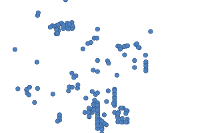

In [0]:
# In AGOL, enrich crimes buffer with the following metrics:
# average annual budget expenses, average retail spend, median household income, and population
enriched_crimes_item = gis.content.get('0e52e0e84aab4a3cb5df690bbedf151a')
enriched_crimes_item

In [0]:
# convert enriched crimes feature layer to a SEDF
# Legend:
# X1001_A = Avg: Annual Budget Exp
# X15001_A = Avg: Retail Goods
# MEDHINC_CY = 2018 Median Household Income
# TOTPOP_CY = 2018 Total Population
enriched_crimes_sdf = enriched_crimes_item.layers[0].query().sdf
enriched_crimes_sdf.T.head()

,0,1,2,3,4,5,6,7,8,9,...,575,576,577,578,579,580,581,582,583,584
AddBldg,,,,,,,,,,,...,,,,,,,,,,
AddNum,7500,11600,441,6200,,,,1400,,441,...,900,3800,,10700,,800,10400,,1400,1300
AddNumFrom,,11632,,,,,,1398,,,...,900,,,,,898,10436,,,
AddNumTo,,11600,,,,,,1432,,,...,1020,,,,,790,10400,,,
AddRange,,11600-11632,,,,,,1398-1432,,,...,900-1020,,,,,790-898,10400-10436,,,


In [0]:
# Groupby zip code and get the means of each of the 4 metrics per zip code
stats_per_zip = enriched_crimes_sdf.groupby('USER_ZIP')[['X1001_A', 'X15001_A', 'MEDHINC_CY', 'TOTPOP_CY']].mean()
stats_per_zip.columns = [
    'Avg Annual Budget Exp', 'Avg Spend on Retail Goods', '2018 Median Household Income', '2018 Total Population']
stats_per_zip.head()

,Avg Annual Budget Exp,Avg Spend on Retail Goods,2018 Median Household Income,2018 Total Population
USER_ZIP,,,,
90001.0,52805.560,15585.533333,42462.583333,2.827407e+06
90002.0,53804.438,15880.356000,43423.800000,2.736145e+06
90003.0,55480.840,16362.915000,43766.000000,2.738898e+06
90007.0,65507.240,19128.950000,47784.000000,3.057090e+06
90011.0,57881.020,16984.220000,44512.000000,3.094829e+06


In [0]:
# merge crimes per zip with stats per zip
merged_per_zip = crimes_per_zip.merge(stats_per_zip, left_index=True, right_index=True)
merged_per_zip.head(10)

,Crimes,Avg Annual Budget Exp,Avg Spend on Retail Goods,2018 Median Household Income,2018 Total Population
USER_ZIP,,,,,
90001.0,12,52805.560000,15585.533333,42462.583333,2.827407e+06
90002.0,5,53804.438000,15880.356000,43423.800000,2.736145e+06
90003.0,2,55480.840000,16362.915000,43766.000000,2.738898e+06
90007.0,1,65507.240000,19128.950000,47784.000000,3.057090e+06
90011.0,1,57881.020000,16984.220000,44512.000000,3.094829e+06
90012.0,232,61965.329698,18091.470690,46173.857759,2.959480e+06
90015.0,9,62796.247778,18350.464444,46613.888889,3.086289e+06
90020.0,1,70311.650000,20454.570000,51038.000000,2.877666e+06
90022.0,1,57959.780000,17007.980000,45156.000000,2.894730e+06


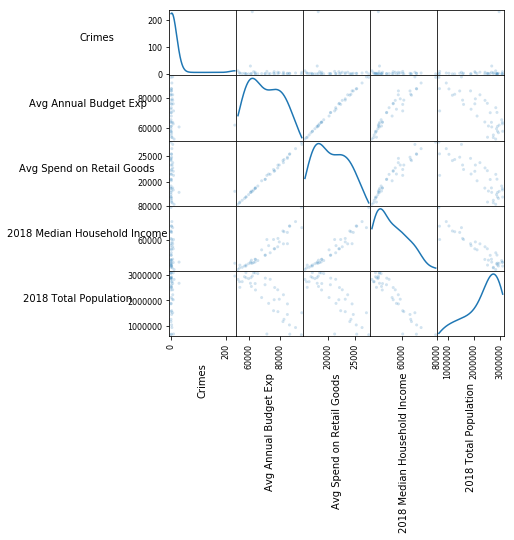

In [0]:
# plot merged dataframe as a scatter matrix
axs = scatter_matrix(merged_per_zip, alpha=0.2, figsize=(6, 6), diagonal='kde')
n = len(merged_per_zip.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

## Data Analysis using ArcPy
Here, we wanted to perform more data analysis using ArcPy to see if we could work with ArcPy and ArcGIS Pro.

In [0]:
# # Process: Find all income crossings (points)
# inFeatures = ["clean_streets_grids_item", "median_income_item"]
# intersectOutput = "income_crossings"
# clusterTolerance = 1.5    
# arcpy.Intersect_analysis(inFeatures, intersectOutput, "", clusterTolerance, "point")

In [0]:
# # Process: Buffer all income crossings by 100 feet
# bufferOutput = "clean_streets_100ft"
# bufferDist = "100 feet"
# arcpy.Buffer_analysis(intersectOutput, bufferOutput, bufferDist)

In [0]:
# # Process: Clip the crimes feature layer to clean_streets_100ft
# clipInput = "crimes_item"
# clipOutput = "crimes_within_100ft_of_crossings"
# arcpy.Clip_analysis(clipInput, bufferOutput, clipOutput)

In [0]:
# # Process: Summarize how much (area) of each type of crime is found
# # within 100 feet of the crime crossings
# statsOutput = "crimes_within_100ft_of_crossings_stats"
# statsFields = [["shape_area", "sum"]]
# caseField = "USER_CATEGORY"
# arcpy.Statistics_analysis(clipOutput, statsOutput, statsFields, caseField)

## Median Household Income Data
Here, we want to see if there is a correlation between areas of clean streets and areas of high median household income to hopefully identify areas with high disposable income since high median household income is used as a proxy for lots of disposable income.

In [0]:
# Create SEDF from median income feature layer
median_income_sdf = pd.DataFrame.spatial.from_layer(median_income_lyr)
median_income_sdf.head()

,GEOID10,Income,OBJECTID,SHAPE,Shape__Area,Shape__Length
0,06037911001,54186,1,"{""rings"": [[[6661890.013041, 2025618.30074525]...",4.025736e+09,353933.808192
1,06037980003,-9999,2,"{""rings"": [[[6597523.24938634, 2100300.4085985...",2.078690e+09,273188.863210
2,06037930301,76667,3,"{""rings"": [[[6665669.12031217, 1967117.0561994...",1.111802e+10,628603.531323
3,06037573003,55434,4,"{""rings"": [[[6501132.57897909, 1748610.3915076...",4.824002e+06,9050.008458
4,06037297602,67775,5,"{""rings"": [[[6474090.41980892, 1721548.5598045...",6.697031e+06,12308.315385


In [0]:
# Testing .query() call to get FeatureSet, and displaying its spatial reference
median_income_fs = median_income_lyr.query(where='Income>50000')
display(median_income_fs)
median_income_fs.spatial_reference

<FeatureSet> 1306 features

{'latestWkid': 6424, 'wkid': 103007}

## More Descriptive Statistics
### Aggregate Points

In [0]:
# Let's aggregate points by median income
sum_fields = ['USER_ZIP Mean', 'USER_ZIP Max']
eq_summary = summarize_data.aggregate_points(point_layer = crimes_lyr,
                                            polygon_layer = median_income_lyr,
                                            keep_boundaries_with_no_points=False,
                                            summary_fields=sum_fields)

In [0]:
eq_summary

{'aggregated_layer': <FeatureCollection>, 'group_summary': <FeatureCollection>}

In [0]:
# Once we have created the summary, let's convert it to a feature collection, 
# and then to a featureset (via Query() ),
# and then to a spatially-enabled data frame
# THEN, we can use it for analysis

# access the aggregation feature collection
eq_aggregate_fc = eq_summary['aggregated_layer']
display(eq_aggregate_fc)

# query this feature collection to get a data as a feature set
eq_aggregate_fset = eq_aggregate_fc.query()
eq_aggregate_fset

<FeatureCollection>

<FeatureSet> 898 features

In [0]:
# convert the FeatureSet to a SEDF
aggregation_df = eq_aggregate_fset.sdf
display(aggregation_df.shape)
aggregation_df.head()

(898, 12)

,AnalysisArea,GEOID10,Income,MAX_USER_ZIP,MEAN_USER_ZIP,OBJECTID,Point_Count,SHAPE,Shape_Area,Shape_Length,Shape__Area,Shape__Length
0,144.423310,06037911001,54186,93553.0,93546.818182,1,24,"{""rings"": [[[6661890.013040975, 2025618.300745...",4.025736e+09,353933.808192,4.025736e+09,353933.808192
1,398.842793,06037930301,76667,91773.0,91737.500000,2,2,"{""rings"": [[[6665669.120312139, 1967117.056199...",1.111802e+10,628603.531323,1.111802e+10,628603.531323
2,0.125369,06037576903,41111,90804.0,90804.000000,3,1,"{""rings"": [[[6514032.777916133, 1743299.304360...",3.495520e+06,7937.925279,3.495520e+06,7937.925279
3,0.694300,06037576001,66302,NaN,NaN,4,5,"{""rings"": [[[6499236.172338799, 1738568.678979...",1.935857e+07,39836.686437,1.935857e+07,39836.686437
4,2.122967,06037980015,51042,90717.0,90717.000000,5,2,"{""rings"": [[[6475224.793196306, 1746389.076724...",5.919246e+07,35568.183276,5.919246e+07,35568.183276


Text(0.5,0,'Median Household Income')

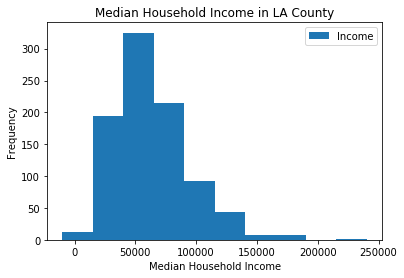

In [0]:
# Histogram distribution of Median Household Income in LA County
income_hist = aggregation_df.plot('OBJECTID','Income', title='Median Household Income in LA County', kind='hist')
income_hist.set_xlabel('Median Household Income')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


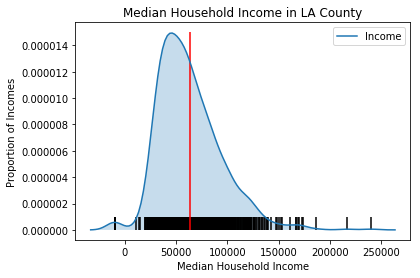

In [0]:
# KDE and rug plots of Median Household Income with average income as a red line
income_kde = sns.kdeplot(aggregation_df['Income'], shade=True)
income_kde.set_title('Median Household Income in LA County')
income_kde.set_xlabel('Median Household Income')
income_kde.set_ylabel('Proportion of Incomes')
plt.vlines(aggregation_df['Income'], 0, 0.000001)
plt.vlines(aggregation_df['Income'].mean(), 0, 0.000015, 'r')

In [0]:
# TODO: Fix create_buffers() call since it keeps failing
# freeways50 = use_proximity.create_buffers(freeways.layers[0], distances=[50], units = 'Miles')
# eq50 = use_proximity.create_buffers(crimes_lyr, distances=[50], units = 'Miles')

### Spatial Join of Median Household Income and Crimes
Testing spatial join, which currently results in an empty dataframe 

In [0]:
# check crimes layer spatial reference of 4326
crimes_lyr.query().spatial_reference

{'latestWkid': 4326, 'wkid': 4326}

In [0]:
# convert median income layer's spatial reference to 4326 to spatial join with crimes layer
income_fs = median_income_lyr.query()
display(income_fs.spatial_reference)
income_fs.spatial_reference = {'latestWkid': 4326, 'wkid': 4326}
display(income_fs.spatial_reference)
median_income2 = income_fs.sdf
median_income2.head()

{'latestWkid': 6424, 'wkid': 103007}

{'latestWkid': 4326, 'wkid': 4326}

,GEOID10,Income,OBJECTID,SHAPE,Shape__Area,Shape__Length
0,06037911001,54186,1,"{""rings"": [[[6661890.013041, 2025618.30074525]...",4.025736e+09,353933.808192
1,06037980003,-9999,2,"{""rings"": [[[6597523.24938634, 2100300.4085985...",2.078690e+09,273188.863210
2,06037930301,76667,3,"{""rings"": [[[6665669.12031217, 1967117.0561994...",1.111802e+10,628603.531323
3,06037573003,55434,4,"{""rings"": [[[6501132.57897909, 1748610.3915076...",4.824002e+06,9050.008458
4,06037297602,67775,5,"{""rings"": [[[6474090.41980892, 1721548.5598045...",6.697031e+06,12308.315385


In [0]:
# spatial join crimes sdf with median income sdf
sdf_joined = crimes_sdf.spatial.join(median_income2)

In [0]:
# notice that we have no columns from both tables in the sdf_joined
sdf_joined.head()

,AddBldg,AddNum,AddNumFrom,AddNumTo,AddRange,Addr_type,BldgName,BldgType,Block,City,...,Y,Ymax,Ymin,Zone,index_right,GEOID10,Income,OBJECTID_right,Shape__Area,Shape__Length


### Geoenrichment using Enrich() and BufferStudyArea
Here, we hope to see how far UCLA and USC students can travel from the campus in certain amounts of time. That way, we get a better idea of whether or not college students could be a potential demographic that businesses could target when setting up their base of operations.

In [0]:
# get BufferStudyArea around UCLA to understand the commute around LA for UCLA students
buffered = BufferStudyArea(area='Los Angeles, CA 90095',
                           radii=[1,3,5], units='Miles', overlap=False)
enrich(study_areas=[buffered], data_collections=['Age'])

,FEM0,FEM10,FEM15,FEM20,FEM25,FEM30,FEM35,FEM40,FEM45,FEM5,...,X,Y,aggregationMethod,apportionmentConfidence,areaType,bufferRadii,bufferUnits,bufferUnitsAlias,populationToPolygonSizeRating,sourceCountry
0,315,288,4370,7531,1303,854,578,457,467,300,...,-118.444903,34.070724,BlockApportionment:US.BlockGroups,2.576,RingBufferBands,1,Miles,Miles,2.191,US
1,2934,3115,2988,4969,7009,6915,5774,4913,4781,2963,...,-118.444903,34.070724,BlockApportionment:US.BlockGroups,2.576,RingBufferBands,3,Miles,Miles,2.191,US
2,7296,7601,7139,10624,15341,15761,14551,12567,12075,7433,...,-118.444903,34.070724,BlockApportionment:US.BlockGroups,2.576,RingBufferBands,5,Miles,Miles,2.191,US


In [0]:
# Example: Using drive times as study areas.
# Create 5, 10, 15, 20 and 25 minute drive times from UCLA and enrich these using the 'Age' data collection.
buffered = BufferStudyArea(area='Los Angeles, CA 90095', 
                           radii=[5, 10, 15, 20, 25], units='Minutes', 
                           travel_mode='Driving')
drive_time_df = enrich(study_areas=[buffered], data_collections=['Age']).spatial
drive_time_df

In [0]:
# Example: Using drive times as study areas.
# Create 5, 10, 15, 20 and 25 minute drive times from USC and enrich these using the 'Age' data collection.
buffered2 = BufferStudyArea(area='Los Angeles, CA 90007', 
                           radii=[5, 10, 15, 20, 25], units='Minutes', 
                           travel_mode='Driving')
drive_time_df2 = enrich(study_areas=[buffered2], data_collections=['Age']).spatial
drive_time_df2

In [0]:
# show this on a map
UCLA_USC_drive_times_map = gis.map('Los Angeles, CA')
# UCLA_USC_drive_times_map.extent = study_area_extent
UCLA_USC_drive_times_map.legend = True
UCLA_USC_drive_times_map.zoom = 10
UCLA_USC_drive_times_map

MapView(layout=Layout(height='400px', width='100%'), legend=True, zoom=10.0)

In [0]:
UCLA_USC_drive_times_map.draw(drive_time_df.to_featureset()) # add the UCLA drive time zones to the map

In [0]:
UCLA_USC_drive_times_map.draw(drive_time_df2.to_featureset()) # add the USC drive time zones to the map

### Spatial Autocorrelation Analysis
Here, we want to see if spatial autocorrelation is relevant to our data, and if so, if our data demonstrates any spatial autocorrelation.

In [0]:
# Use PySAL to read in shape file, calculate weights, and plot dataframe
shp = ps.lib.io.open(shpFileIn)

# queen weights:
qW = ps.lib.weights.Queen(shp)

# rook weights:
rW = ps.lib.weights.Rook(shp)

# read into geopandas 
dataframe = gpd.read_file(shpFileIn)

/opt/conda/lib/python3.6/site-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 2268 disconnected observations 
  Island ids: 302, 464, 608, 809, 995, 1111, 1112, 1113, 1114, 1123, 1124, 1125, 1126, 1127, 1134, 1136, 1137, 1138, 1139, 1147, 1148, 1150, 1151, 1152, 1153, 1155, 1162, 1163, 1164, 1165, 1166, 1167, 1182, 1185, 1186, 1191, 1193, 1194, 1196, 1213, 1230, 1240, 1244, 1254, 1293, 1294, 1295, 1327, 1362, 1548, 1554, 1555, 1573, 1574, 1596, 1626, 1627, 1660, 1661, 1662, 1677, 1683, 1692, 1702, 1703, 1732, 1733, 1734, 1735, 1809, 1822, 1839, 1859, 1903, 1910, 1960, 2520, 2843, 3505, 4927, 5042, 5056, 5165, 5331, 5379, 5388, 5660, 6105, 6161, 6441, 6566, 6593, 6595, 7470, 7571, 7580, 7665, 7763, 7927, 7985, 8188, 8239, 8354, 8395, 8406, 8504, 8638, 8738, 8864, 9433, 9788, 9925, 10215, 10364, 10448, 10780, 11147, 11463, 11976, 12249, 12262, 12323, 12546, 12987, 13270, 13485, 13586, 13610, 13720, 13876, 13992, 14246, 14428, 14648, 15147, 15459, 15590, 15793, 16145, 17

/opt/conda/lib/python3.6/site-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 41909 disconnected observations 
  Island ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 19

Text(264.298,0.5,'Latitude')

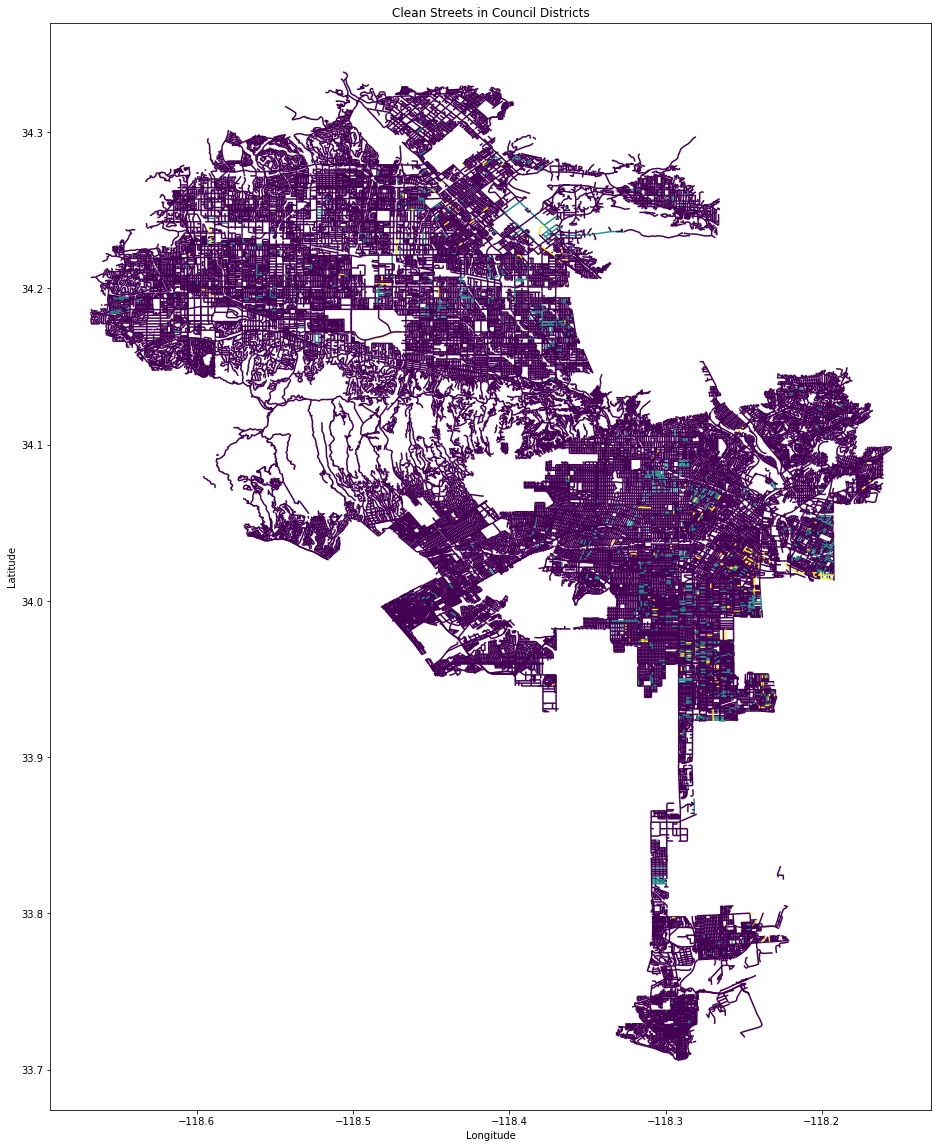

In [0]:
# plot council districts by clean streets
districts_plot = dataframe.plot(figsize=(20,20), column='CS_RoundSc')
districts_plot.set_title('Clean Streets in Council Districts')
districts_plot.set_xlabel('Longitude')
districts_plot.set_ylabel('Latitude')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/opt/conda/lib/python3.6/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 3
  Warn('Warning: setting k to %d' % k_q, UserWarning)


Text(115.587,0.5,'Latitude')

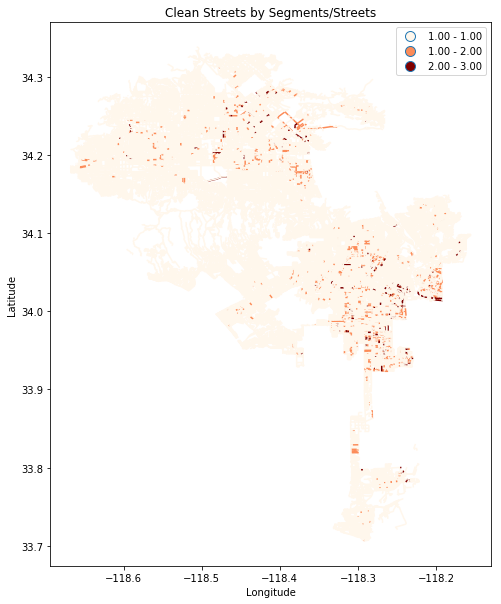

In [0]:
# Plot Clean Streets scores for segments (same as Part 7)
css_plot2 = clean_streets_segments_Q3.plot(
    column='CS_RoundSc', cmap='OrRd', scheme ='quantiles', k=41, 
    categorical=False, legend=True, figsize=(10,10)
)
css_plot2.set_title('Clean Streets by Segments/Streets')
css_plot2.set_xlabel('Longitude')
css_plot2.set_ylabel('Latitude')

In [0]:
# Use PySAL to read in shape file and get queen weights
shp = ps.lib.io.open(shpFileIn)

# queen weights:
W = ps.lib.weights.Queen(shp)

/opt/conda/lib/python3.6/site-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 2268 disconnected observations 
  Island ids: 302, 464, 608, 809, 995, 1111, 1112, 1113, 1114, 1123, 1124, 1125, 1126, 1127, 1134, 1136, 1137, 1138, 1139, 1147, 1148, 1150, 1151, 1152, 1153, 1155, 1162, 1163, 1164, 1165, 1166, 1167, 1182, 1185, 1186, 1191, 1193, 1194, 1196, 1213, 1230, 1240, 1244, 1254, 1293, 1294, 1295, 1327, 1362, 1548, 1554, 1555, 1573, 1574, 1596, 1626, 1627, 1660, 1661, 1662, 1677, 1683, 1692, 1702, 1703, 1732, 1733, 1734, 1735, 1809, 1822, 1839, 1859, 1903, 1910, 1960, 2520, 2843, 3505, 4927, 5042, 5056, 5165, 5331, 5379, 5388, 5660, 6105, 6161, 6441, 6566, 6593, 6595, 7470, 7571, 7580, 7665, 7763, 7927, 7985, 8188, 8239, 8354, 8395, 8406, 8504, 8638, 8738, 8864, 9433, 9788, 9925, 10215, 10364, 10448, 10780, 11147, 11463, 11976, 12249, 12262, 12323, 12546, 12987, 13270, 13485, 13586, 13610, 13720, 13876, 13992, 14246, 14428, 14648, 15147, 15459, 15590, 15793, 16145, 17

In [0]:
W

In [0]:
# Use the concept of spatial lag to get rolling windows of clean streets scores
clean_streets_segments_Q3['CS_RoundScLag'] = ps.lib.weights.lag_spatial(W, clean_streets_segments_Q3['CS_RoundSc'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/mapclassify/classifiers.py:95: UserWarning: Warning: Not enough unique values in array to form k classes
  UserWarning)
/opt/conda/lib/python3.6/site-packages/mapclassify/classifiers.py:96: UserWarning: Warning: setting k to 34
  Warn('Warning: setting k to %d' % k_q, UserWarning)


Text(115.587,0.5,'Latitude')

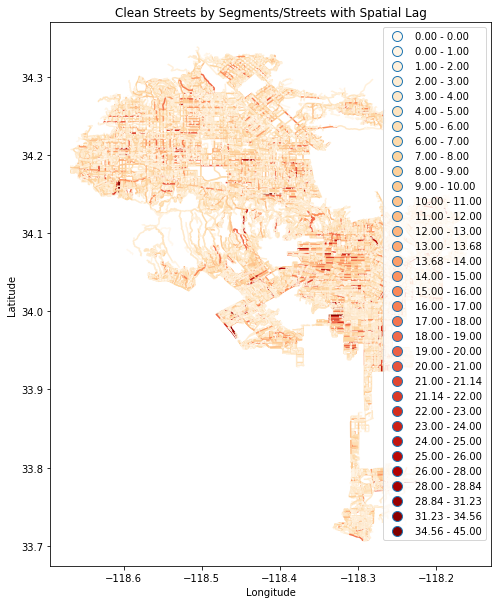

In [0]:
# Plot Clean Streets scores with spatial lag for segments
css_lag_plot = clean_streets_segments_Q3.plot(
    column='CS_RoundScLag', cmap='OrRd', scheme ='quantiles', 
    k=9000, legend=True, figsize=(10,10)
)
css_lag_plot.set_title('Clean Streets by Segments/Streets with Spatial Lag')
css_lag_plot.set_xlabel('Longitude')
css_lag_plot.set_ylabel('Latitude')

## Global Spatial Autocorrelation

In PySAL, commonly-used analysis methods are very easy to access. For example, if we were interested in examining the spatial dependence in `HR90` we could quickly compute a Moran's $I$ statistic:

In [0]:
# Compute Moran's I statistic
I_HR90 = ps.explore.esda.Moran(clean_streets_segments_Q3['CS_RoundSc'], W)

('WARNING: ', 302, ' is an island (no neighbors)')
('WARNING: ', 464, ' is an island (no neighbors)')
('WARNING: ', 608, ' is an island (no neighbors)')
('WARNING: ', 809, ' is an island (no neighbors)')
('WARNING: ', 995, ' is an island (no neighbors)')
('WARNING: ', 1111, ' is an island (no neighbors)')
('WARNING: ', 1112, ' is an island (no neighbors)')
('WARNING: ', 1113, ' is an island (no neighbors)')
('WARNING: ', 1114, ' is an island (no neighbors)')
('WARNING: ', 1123, ' is an island (no neighbors)')
('WARNING: ', 1124, ' is an island (no neighbors)')
('WARNING: ', 1125, ' is an island (no neighbors)')
('WARNING: ', 1126, ' is an island (no neighbors)')
('WARNING: ', 1127, ' is an island (no neighbors)')
('WARNING: ', 1134, ' is an island (no neighbors)')
('WARNING: ', 1136, ' is an island (no neighbors)')
('WARNING: ', 1137, ' is an island (no neighbors)')
('WARNING: ', 1138, ' is an island (no neighbors)')
('WARNING: ', 1139, ' is an island (no neighbors)')
('WARNING: ', 114

('WARNING: ', 36604, ' is an island (no neighbors)')
('WARNING: ', 36606, ' is an island (no neighbors)')
('WARNING: ', 36609, ' is an island (no neighbors)')
('WARNING: ', 36612, ' is an island (no neighbors)')
('WARNING: ', 36618, ' is an island (no neighbors)')
('WARNING: ', 36619, ' is an island (no neighbors)')
('WARNING: ', 36620, ' is an island (no neighbors)')
('WARNING: ', 36621, ' is an island (no neighbors)')
('WARNING: ', 36622, ' is an island (no neighbors)')
('WARNING: ', 36627, ' is an island (no neighbors)')
('WARNING: ', 36633, ' is an island (no neighbors)')
('WARNING: ', 36645, ' is an island (no neighbors)')
('WARNING: ', 36652, ' is an island (no neighbors)')
('WARNING: ', 36661, ' is an island (no neighbors)')
('WARNING: ', 36663, ' is an island (no neighbors)')
('WARNING: ', 36670, ' is an island (no neighbors)')
('WARNING: ', 36672, ' is an island (no neighbors)')
('WARNING: ', 36682, ' is an island (no neighbors)')
('WARNING: ', 36683, ' is an island (no neighb

In [0]:
I_HR90.I, I_HR90.p_sim

(0.12018466314770346, 0.001)

Thus, the $I$ statistic is $0.1201$ for this data, and has a very small $p$ value. 

In [0]:
I_HR90.sim[0:5]

array([ 0.00146054,  0.01440108,  0.00166258, -0.00285329, -0.00374641])

A simple way to visualize this distribution is to make a KDEplot (like we've done before), and add a rug showing all of the simulated points, and a vertical line denoting the observed value of the statistic:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.15, 0.15)

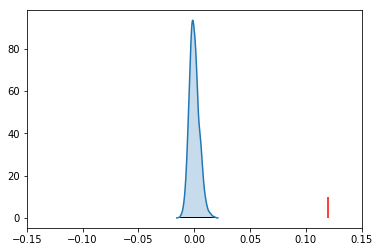

In [0]:
# KDEplot, and add a rug showing all of the simulated points, 
# and a vertical line denoting the observed value of the statistic:
sns.kdeplot(I_HR90.sim, shade=True)
plt.vlines(I_HR90.sim, 0, 0.5)
plt.vlines(I_HR90.I, 0, 10, 'r')
plt.xlim([-0.15, 0.15])

Instead, if our $I$ statistic were close to our expected value, `I_HR90.EI`, our plot might look like this:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.15, 0.15)

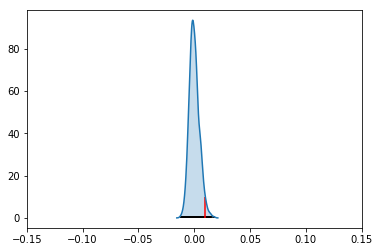

In [0]:
# Instead, if our I statistic were close to our expected value, `I_HR90.EI`, our plot might look like this:
sns.kdeplot(I_HR90.sim, shade=True)
plt.vlines(I_HR90.sim, 0, 1)
plt.vlines(I_HR90.EI+.01, 0, 10, 'r')
plt.xlim([-0.15, 0.15])

The result of applying Moran's I is that we conclude the map pattern is not spatially random, but instead there is a signficant spatial association in clean streets scores in Los Angeles counties in 2018.

This result applies to the map as a whole, and is sometimes referred to as "global spatial autocorrelation". Next we turn to a local analysis where the attention shifts to detection of hot spots, cold spots and spatial outliers.

## Local Autocorrelation Statistics

In addition to the Global autocorrelation statistics, PySAL has many local autocorrelation statistics. Let's compute a local Moran statistic for the same data shown above:

In [0]:
LMo_HR90 = ps.explore.esda.Moran_Local(clean_streets_segments_Q3['CS_RoundSc'].values, W)

/opt/conda/lib/python3.6/site-packages/pysal/explore/esda/moran.py:895: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


Now, instead of a single $I$ statistic, we have an *array* of local $I_i$ statistics, stored in the `.Is` attribute, and p-values from the simulation are in `p_sim`. 

In [0]:
LMo_HR90.Is[0:10], LMo_HR90.p_sim[0:10]

(array([0.02307031, 0.02307031, 0.02307031, 0.02307031, 0.02307031,
        0.02307031, 0.02307031, 0.02307031, 0.02307031, 0.02307031]),
 array([0.047, 0.039, 0.041, 0.186, 0.046, 0.084, 0.04 , 0.024, 0.108,
        0.043]))

We can adjust the number of permutations used to derive every *pseudo*-$p$ value by passing a different `permutations` argument:

In [0]:
LMo_HR90 = ps.explore.esda.Moran_Local(clean_streets_segments_Q3['CS_RoundSc'].values, W, permutations=2)

/opt/conda/lib/python3.6/site-packages/pysal/explore/esda/moran.py:895: RuntimeWarning: divide by zero encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/opt/conda/lib/python3.6/site-packages/pysal/explore/esda/moran.py:895: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In addition to the typical clustermap, a helpful visualization for LISA statistics is a Moran scatterplot with statistically significant LISA values highlighted. 

This is very simple, if we use the same strategy we used before:

First, construct the spatial lag of the covariate:

In [0]:
Lag_HR90 = ps.lib.weights.lag_spatial(W, clean_streets_segments_Q3['CS_RoundSc'].values)
HR90 = clean_streets_segments_Q3['CS_RoundSc'].values

Then, we want to plot the statistically-significant LISA values in a different color than the others. To do this, first find all of the statistically significant LISAs. Since the $p$-values are in the same order as the $I_i$ statistics, we can do this in the following way

In [0]:
sigs = HR90[LMo_HR90.p_sim <= .001]
W_sigs = Lag_HR90[LMo_HR90.p_sim <= .001]
insigs = HR90[LMo_HR90.p_sim > .001]
W_insigs = Lag_HR90[LMo_HR90.p_sim > .001]

Then, since we have a lot of points, we can plot the points with a statistically insignficant LISA value lighter using the `alpha` keyword. In addition, we would like to plot the statistically significant points in a dark red color. 

In [0]:
b,a = np.polyfit(HR90, Lag_HR90, 1)

Matplotlib has a list of [named colors](http://matplotlib.org/examples/color/named_colors.html) and will interpret colors that are provided in hexadecimal strings:

Text(0.5,0,'HR90')

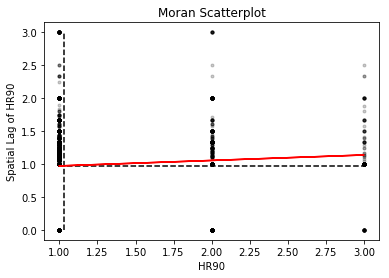

In [0]:
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
 # dashed vert at mean of the last year's PCI
plt.vlines(HR90.mean(), Lag_HR90.min(), Lag_HR90.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Lag_HR90.mean(), HR90.min(), HR90.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(HR90, a + b*HR90, 'r')
# plt.text(s='$I = %.3f$' % I_HR90.I, x=50, y=15, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of HR90')
plt.xlabel('HR90')

We can also make a LISA map of the data. Here, we are calculating hotspots and coldspots.

In [0]:
sig = LMo_HR90.p_sim < 0.05

In [0]:
sig.sum()

0

In [0]:
hotspots = LMo_HR90.q==1 * sig

In [0]:
hotspots.sum()

0

In [0]:
coldspots = LMo_HR90.q==3 * sig

In [0]:
coldspots.sum()

0

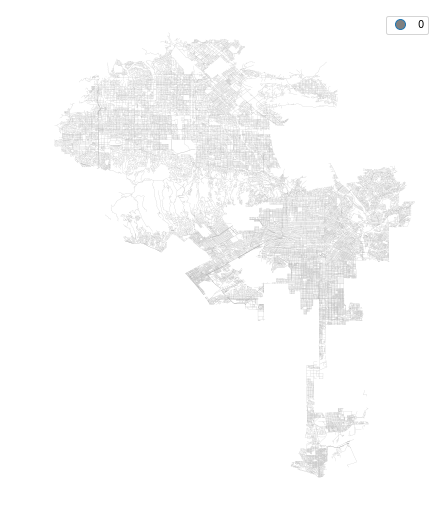

In [0]:
# map of a lack of hotspots and coldspots
hmap = colors.ListedColormap(['grey', 'red'])
f, ax = plt.subplots(1, figsize=(9, 9))
clean_streets_segments_Q3.assign(cl=hotspots*1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

### Analysis Reflection:
Our actual analysis steps were different compared to our project proposal in many ways. 

One way is that we only used the Clean Streets 2018 Q3 datasets for segments and grids since we wanted to work with the most recent data. 

Another way is that we did not convert the CRS to a standardized CRS, such as 2230, since the other CRS values of the other data sets worked well with each other, as shown in the LA maps. Instead of performing the adjacency check via sdf.touches(sdf.shift()) on adjacent rows of data to determine if there is a relationship between street cleanliness of adjacent neighborhoods, we created 100 foot buffers around each crime location and overlayed that layer with the clean streets layer to determine crimes near clean streets. 

We came to the conclusion that we can use the relationship between crime locations and clean streets to determine which areas have less crime reports (and therefore which areas are safer) as well as which areas have cleaner streets, which act as a proxy for communities with more disposable income that people could spend at these new businesses. 

In addition, we incorporated spatial autocorrelation analysis to see if spatial autocorrelation is relevant to our data, and if so, if our data demonstrates any spatial autocorrelation. From our analysis above, we see that we could not definitively determine any hotspots or coldspots for clean streets. We suspect that this may be the case because our clean streets scores are discrete values of 1, 2, and 3, as opposed to continuous values, which would provide us with a broader spectrum of values with which to better determine hotspots and coldspots of clean streets, specifically using spatial autocorrelation analysis.

# 9. Summary of Products and Results
*Describe what you found, and why it is important; illustrate the findings with maps/charts reflecting your results.*

*If you create new datasets or map in AGOL, please share them to the DSC 170 Data group, and reference them in your notebook by ID via gis.content.get.*

### Spatial Autocorrelation Analysis
When performing spatial autocorrelation analysis, the result of applying Moran's I statistic is that we conclude the map pattern is not spatially random, but instead there is a signficant spatial association in clean streets scores in Los Angeles counties in 2018.

This result applies to the map as a whole, and is sometimes referred to as "global spatial autocorrelation".

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.15, 0.15)

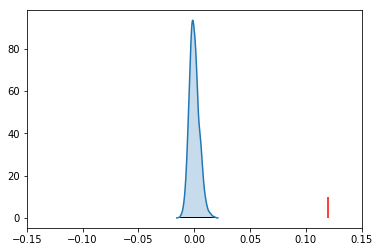

In [0]:
# KDEplot, and add a rug showing all of the simulated points, 
# and a vertical line denoting the observed value of the statistic:
sns.kdeplot(I_HR90.sim, shade=True)
plt.vlines(I_HR90.sim, 0, 0.5)
plt.vlines(I_HR90.I, 0, 10, 'r')
plt.xlim([-0.15, 0.15])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.15, 0.15)

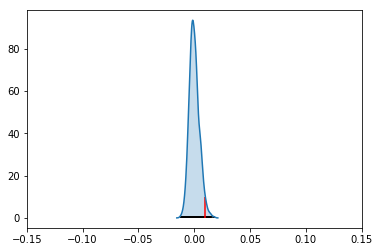

In [0]:
# Instead, if our I statistic were close to our expected value, `I_HR90.EI`, our plot might look like this:
sns.kdeplot(I_HR90.sim, shade=True)
plt.vlines(I_HR90.sim, 0, 1)
plt.vlines(I_HR90.EI+.01, 0, 10, 'r')
plt.xlim([-0.15, 0.15])

### GIS Maps Showing Clean Streets, Crimes, and Median Income:
From the crimes histograms, we see that a majority of crimes in LA County involve a vehicle, such as Grand Theft Auto. So, we want to account for crimes as a proxy for a safety metric for business owners to set up their businesses so employees are safe traveling to and from work, particularly if they will drive to and from work since we want to minimize the probability that someone will damage and/or steal an employee's car.

Looking at the map, there are clusters of crimes around areas of lower income households and dirtier streets. This means there is a spatial correlation between crimes, income, and clean streets. 

All of the top cities based on clean streets, income, and crime, have really clean streets and little to no crime.

___Average Household Income (US Dollars) and Best Streets to Set Up Businesses for Top Cities:___
- Westwood/UCLA (Northwest)
    - 128,813
    - Wilshire Boulevard
    - Council District 5 - Paul Koretz: indifferent about cleaning streets
        - In October 2018 (Q4 2018), someone created a petition to clean up the streets of the Pico Robertson neighborhood: https://www.change.org/p/paul-koretz-clean-up-the-streets-of-pico-robertson-and-help-us-take-back-our-community 
            - On the map displaying clean streets, we see some yellow streets, which indicate this neighborhood.
        - Known for abusing his power: https://www.citywatchla.com/index.php/archive/7640-paul-koretz-abuse-of-power

- San Pedro/Rancho Palos Verde (coast/South)
    - 118,893
    - South Pacific Avenue
    - Council District 15 - Joe Buscaino: sincere about cleaning streets
        - His 'Save Our Streets' post on his website: http://www.la15th.com/save_our_streets_poll

- Granada Hills/San Fernando (North)
    - 111,532
    - Rinaldi Street
    - Council District 7 - Monica Rodriguez: sincere about cleaning streets
        - Her Twitter post about street safety: https://twitter.com/MRodCD7/status/951233732018454528

In [0]:
# Monica Rodriguez tweet about street safety
# tweets.Tweet(tweets.s)

- Pasadena (Northeast)
    - 70,845
    - South Arroyo Parkway, South Fair Oaks Avenue
    - Council District 14 - Jose Hulzar
        - His post about the Team Up to Clean Up event on his website: https://www.josehuizar.com/event/team-up-to-clean-up/

- South Los Angeles/Culver City (central)
    - 51,430
    - West Slauson Avenue, Figueroa Street
    - Council District 10 - Herb J. Wesson, Jr.
        - A newspaper article saying he raised over 500,000 USD in donations: https://lafocusnewspaper.com/item/wesson-tops-500000-in-fundraising-for-la-county-supervisor

<Item title:"LA Clean Streets, Crime, and Median Income" type:Web Map owner:amfojas_UCSDOnline6>
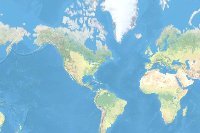

In [0]:
# get final LA map with clean streets, crime, and median income from AGOL
final_LA_map_item = gis.content.get('f26770463720484f931b1961edc10027')
final_LA_map_item

In [0]:
WebMap(final_LA_map_item) # display the web map from AGOL 

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [0]:
LA_map # display the same web map created in this notebook

MapView(layout=Layout(height='400px', width='100%'), legend=True, ready=True)

In [0]:
UCLA_USC_drive_times_map # display the web map of drive times created in this notebook

MapView(layout=Layout(height='400px', width='100%'), legend=True, zoom=10.0)

<Item title:"LA Clean Streets, Crime Buffers, and Median Income" type:Web Map owner:amfojas_UCSDOnline6>
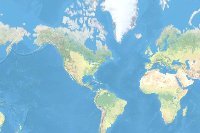

In [0]:
# get final LA map with clean streets, crime buffers, and median income from AGOL
final_LA_map2_item = gis.content.get('bd05d3d3d24b4b1999dfc0b803d66e6d')
final_LA_map2_item

In [0]:
WebMap(final_LA_map2_item) # display the web map from AGOL

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [0]:
LA_map2 # display the same web map created in this notebook

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [0]:
crimes_map # display the crimes heat map created in this notebook

# 10. Discussion
*The discussion should include parts:*

*1) Discuss your findings with respect to the literature sources in section 3. What do the results mean in the context of what is already known? What is new? Does it validate what was found in literature? How do your results improve our understanding of the problem?*

*2) Of particular importance is a discussion of any trade-offs and decision points that you had to consider. This may include a discussion of any performance issues, width of buffers you applied, projections you chose, spatial operations you used, map combination techniques, and other issues we discussed in class.*

## 1)

___Literature Review:___

### Hein Online: 

This article described the relationship between crime and real estate redevelopment in Downtown Los Angeles. As a reminder, Los Angeles’s Skid Row is at the epicenter of an urban struggle that may reveal how America’s disorderly urban neighborhoods experience change. 

Our results supported the findings in this article due to the fact that none of our selected cities were located in the urban areas of Los Angeles. These areas (such as Chinatown) had high crime rates, very unclean streets, and fairly low levels of income. We did not advise business owners to build their businesses in these areas due to the lack of success we predicted. Much of what was presented in this article was confirmed in our project.

### Taylor and Francis Online:

This article examined how local repressive policies affect the economic mobility of immigrant fruit vendors in Los Angeles County.

Geographical positioning and alliance-building were of the utmost importance for *fruteros* in Los Angeles, in addition to the performance and maintenance of personal, professional and symbolic hygiene. 

In the article it is noted that, "*day labour provides some undocumented immigrants with their first job in the country and gives them a foothold in the urban economy; for others, day labour provides income while temporarily unemployed from a regular job elsewhere.*" Our project mainly focused on the effects that clean streets, crime, and income have on larger businesses as opposed to day labor for immigrants. However, it did become apparent to us throughout the project why these immigrants choose to conduct their business in urban areas. The lower cost of living on conjunction with the lack of competitiveness makes it an ideal spot to set up shop.

### NBC Los Angeles:

This article was written to educate people about the rise in crime amongst the homeless population in Los Angeles. We did not end up finding much in this project with regard to location of homeless people in Los Angeles, however, when we looked at downtown Los Angeles it was clear that there was a correlation between areas with unclean streets and areas with low levels of income.

Adding more about the homeless population to our project would've been helpful for business that seek to help those who are underprivilidged or businesses that are concered with people loitering or setting up camp near their storefront.

___Current Context:___

In the context of what is already known, we know that the Westwood/UCLA region is one of the best places, with Wilshire Boulevard being one of the best streets, to set up a business since this region generally has a higher median household income, making the population that lives here have a higher amount of disposable income that they could spend at businesses. In addition, we know that UCLA is a prestigious university with a large student body, so a business owner could cater their business to satisfy college students and, in a broader context, the younger generation. By targeting a younger demographic for their business, the business owner could sustain their business for the long-term since college students will graduate, allowing them to get jobs that will give them more disposable income that they could spend at a particular business. Furthermore, the younger generation will start families, so they will pass down their preferences to the next generation, creating a high potential that the next generation will be future customers at that same business. Ultimately, the long-term strategy of catering a business to the younger generation will benefit business owners.

___New Findings:___

In terms of new findings, we determined the top 5 locations/regions for business owners to set up their business:
- Westwood/UCLA (Northwest)
- San Pedro/Rancho Palos Verde (coast/South)
- Granada Hills/San Fernando (North)
- Pasadena (Northeast)
- South Los Angeles/Culver City (central)
Each of these regions are unique in that they are in different geographic regions within Los Angeles County, providing some location variety for business owners depending on the demands of their business. For example, a fishing business would be better located in San Pedro/Rancho Palos Verde since this region is along the Southern coast of LA County. 

In addition, each of these regions have various median household income values, providing some economic variety for business owners depending on the intended demographics of their business. For example, a thrift store or Dollar Tree would be better located in South Los Angeles/Culver City since these types of stores have a business model to offer low prices on goods to people and an inherent perception to target lower-income people.

Furthermore, 4 of the 5 locations/regions that are best for businesses have council members who are publicly advocating and actively pushing for clean streets in their respective council districts. The only anomaly is Westwood/UCLA, whose council member named Paul Koretz has a history of abusing his power. For context, our clean streets data is the most recent data from Q3 2018. However, we found a change.org petition created in Q4 2018 to clean up the streets of the Pico Robertson neighborhood, which is within the same council district as Westwood/UCLA. So, we are curious to see how long this council member will ignore cleaning streets to ultimately see if there is any major impact on income, crimes, or other important metrics for business owners looking to set up businesses in this area. 


## 2) 

___Buffer Sizes:___

In terms of width of buffers we applied, we only worked with 100 foot buffers around crime locations to see any crimes that overlayed with clean streets. We specifically picked 100 foot buffers since this distance would provide us with a walkable area of about 10 blocks, assuming 1 block is about 10 feet, near clean streets and crimes. We could work with different size buffers to see any crimes that overlay with clean streets to, for example, determine crimes within a reasonable driving distance from clean streets. This method would be particularly useful since most of the crimes committed in LA County involve a vehicle.

___Projections:___

Here are the projections for the data sets:
- Crimes, {'latestWkid': 4326, 'wkid': 4326}
- Clean streets grids, {'latestWkid': 3857, 'wkid': 102100}
- Clean streets segments, {'latestWkid': 3857, 'wkid': 102100}
- Median income, {'latestWkid': 6424, 'wkid': 103007}

All of these projections work well together since all of them focus on LA County. From class, we know 4326 and 3857 work well with southern California maps. 6424 covers the following California counties: Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.

___Spatial Operations:___

We constructed a 100 foot buffer around all clean streets by using use_proximity.create_buffers().

We determined the intersection of crimes that happened within the clean streets buffer using overlay_layers().

In AGOL, we enriched the crimes buffer with the following metrics: average annual budget expenses, average retail spend, median household income, and population.

We aggregated crime points by median income using summarize_data.aggregate_points(). Once we have created the summary, let's convert it to a feature collection, and then to a featureset (via Query() ) and then to a spatially-enabled data frame. Then, we can use it for analysis.

We performed geoenrichment using BufferStudyArea to see how far UCLA students can travel from the campus in certain amounts of time. That way, we get a better idea of whether or not college students could be a potential demographic that businesses could target when setting up their base of operations.

Finally, we performed spatial autocorrelation analysis to see if spatial autocorrelation is relevant to our data, and if so, if our data demonstrates any spatial autocorrelation.

___Map Combination Techniques:___

For map combination, we used gis.map() to create new maps. Then, we called map.add_layer(new_layer) to add new feature layers to the map.

# 11. Conclusions and Future Work
- *Did you manage to completely answer your initial research question?*
    - *If not, what additional data and additional analysis steps can you think of?*
- *Can your approach be extended to other areas or topics, and use additional datasets?*
- *How do you expect the results to be used and by whom?*

Initially, we proposed a plan to answer our initial research question of whether there is a correlation between clean streets using the Los Angeles Clean Streets Index and other city features, such as household median income and crime locations. Throughout our analysis, we concluded that there is a correlation between clean streets, income, and crimes. Despite coming to this conclusion, our practical business use case can be tested only if an actual business owner uses our findings and insights to pick an optimal location to set up their business. Then, we would have to collect business and financial data from that business and perform data science and analysis to substantiate our conclusion based on a real-world use case. Afterwards, we could confidently say that we completely answered our initial research question.

One additional data set that we could incorporate into our analysis is the average monthly income and profit of different business types in certain districts. Using this data set, we could get a better informed decision of the optimal locations for business owners to set up businesses.

Another additional data set could be the clean streets datasets from an earlier time period to see any continuities and changes over time in clean streets, income, and crimes.

Our approach could be extended to other geographic regions besides LA County to get insights on the optimal locations for business owners to set up businesses in other parts of the world. For example, if a business owner wants to create an international office in England, then we could implement our approach to a specific location in England and find the optimal locations so the business owner could make a better informed decision on where to set up their business.

Ultimately, we expect the results to be used by business owners looking to open their first location of a brand new business or open a new location of an existing business.